In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:90%;}
div.CodeMirror {font-family:Consolas; font-size:18pt;}
div.output {font-size:19pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:19pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
span.toc-item-num{display:none;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
div.CodeMirror-lines > div {padding-left:10px;}
table.dataframe{font-size:18px;}
</style>
"""))

<b><font size="6" color="red">ch13. 데이터 시각화</font></b>

In [2]:
# 그래프 저장시 해상도 높게
%config InlineBackend.figure_format = "retina"
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지
# warning(경고) 안보이게
import warnings
warnings.filterwarnings(action='ignore') # 경고 메세지 안 보이게
# warnings.filterwarnings(action='default') # 경고 메세지 보이게

# 3절. Seaborn
- matplotlib을 기반으로 만든 고수준 그래픽 라이브러리
    * 공식사이트 : https://seaborn.pydata.org 
    * seaborn API : https://seaborn.pydata.org/api.html 
- Seaborn으로 그래프를 그리기 위해서 다음 단계를 따릅니다.
    1) 데이터 준비<br>
    2) 미적속성 설정 <br>
    3) 함수를 이용하여 그래프 그리기(관계형-수치형, 범주형, 쌍관계, 밀도, 회귀,다중그래프)<br>
    4) 그래프 출력(show), 저장(savefig)

## 3.1 데이터 준비하기
- iris, titanic

In [4]:
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [7]:
iris.info() # dtype, 전체행수, 열별결측치를 제외한 데이터수, 메모리사용량

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# 열별 결측치 수
iris.isna().sum()
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
iris['species'].unique() # 범주형 데이터들의 종류

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [12]:
iris.species.value_counts() # unique 범주형 데이터의 갯수

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [5]:
titanic = sns.load_dataset('titanic')
titanic.head()
# pclass : 티켓클래스(1,2,3), sibsp:함께탑승한형제나배우자수
# Parch : 타이타닉 호에 동승한 부모 / 자식의 수
# Fare : 승객 요금
# class : 티켓클래스(third/second/first)
# Cabin : 방 호수
# Embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴
# embark_town : 탑승도시

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [16]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## 3.2 미적 속성 설정하기(style, context, palette, figsize...)
### 1) 그래프 스타일 지정
- 폰트 초기화로 한글설정과 같이 함수 사용<br>
plt.rc('font', family='Malgun Gothic') # 윈도우즈<br>
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지<br>
- https://seaborn.pydata.org/generated/seaborn.axes_style.html#seaborn.axes_style
- https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot : 범례사용

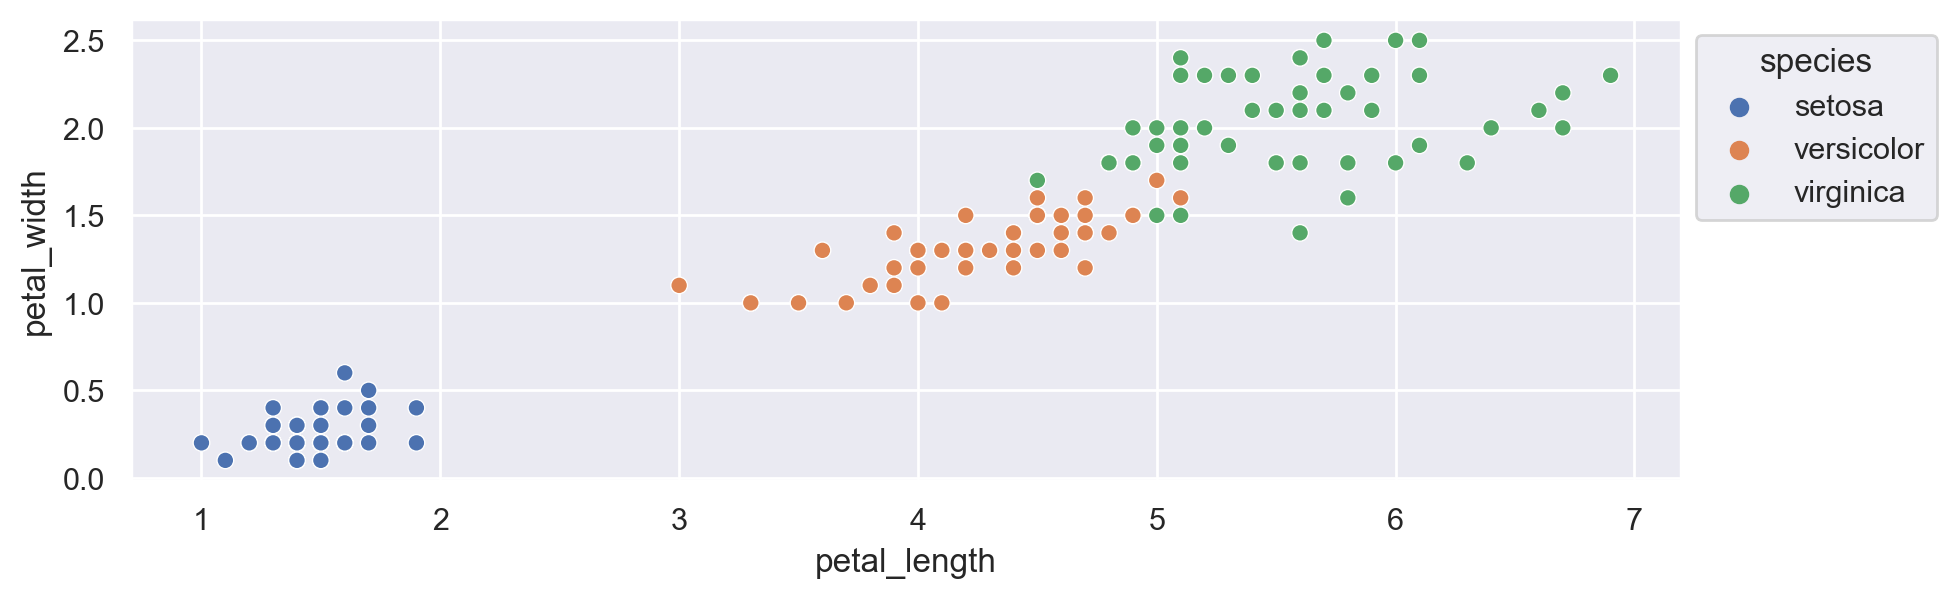

In [5]:
plt.figure(figsize=(10,3))
sns.set(style='darkgrid') # white, darkgrid, whitegrid, dark, ticks
ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

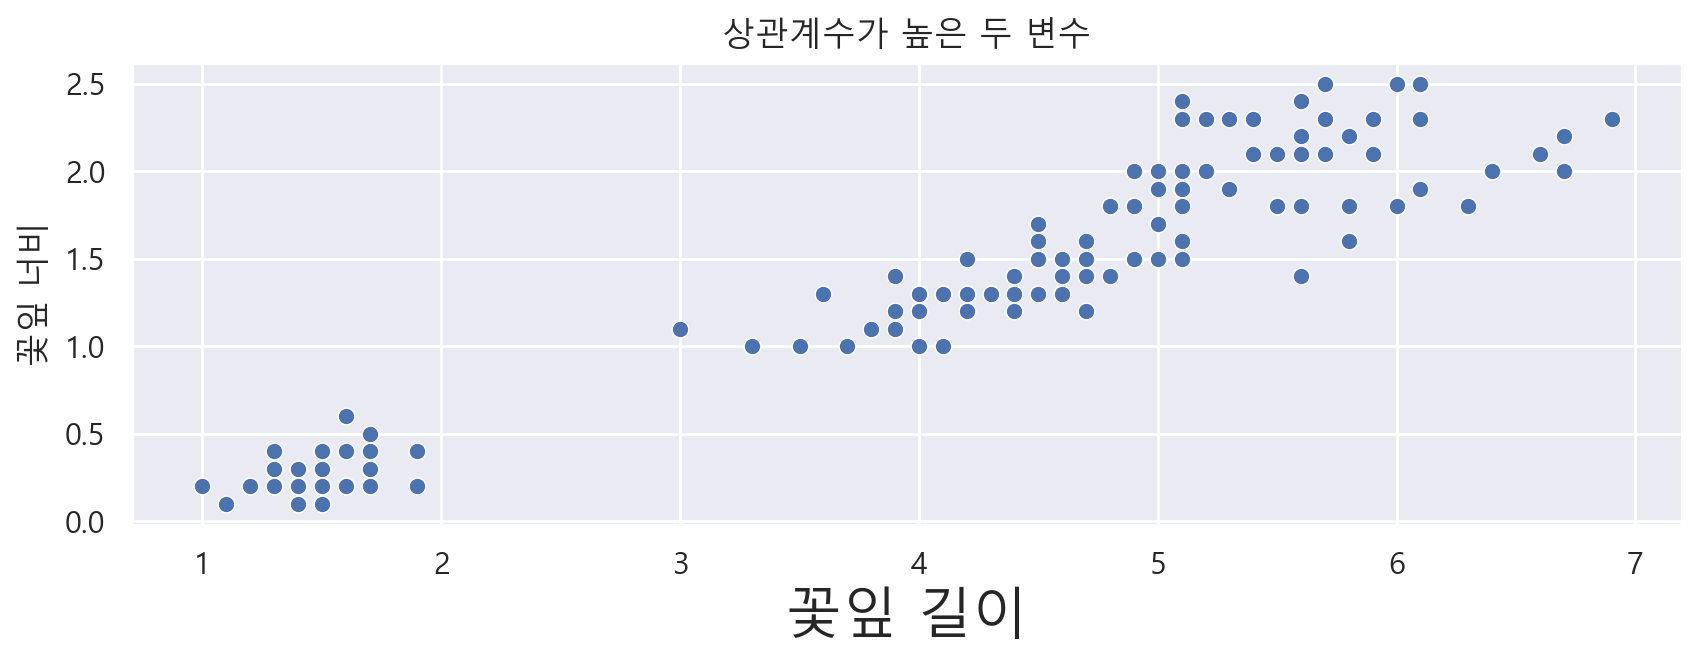

In [6]:
plt.figure(figsize=(10,3))
sns.set(style='darkgrid') # white, darkgrid, whitegrid, dark, ticks
# sns.set함수를 수행하면 기존의 설정이 초기화
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지
ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width')
ax.set(title='상관계수가 높은 두 변수',
      ylabel='꽃잎 너비')
ax.set_xlabel('꽃잎 길이', fontsize=20)
plt.show()

### 2) 컨텍스트 지정(배율)

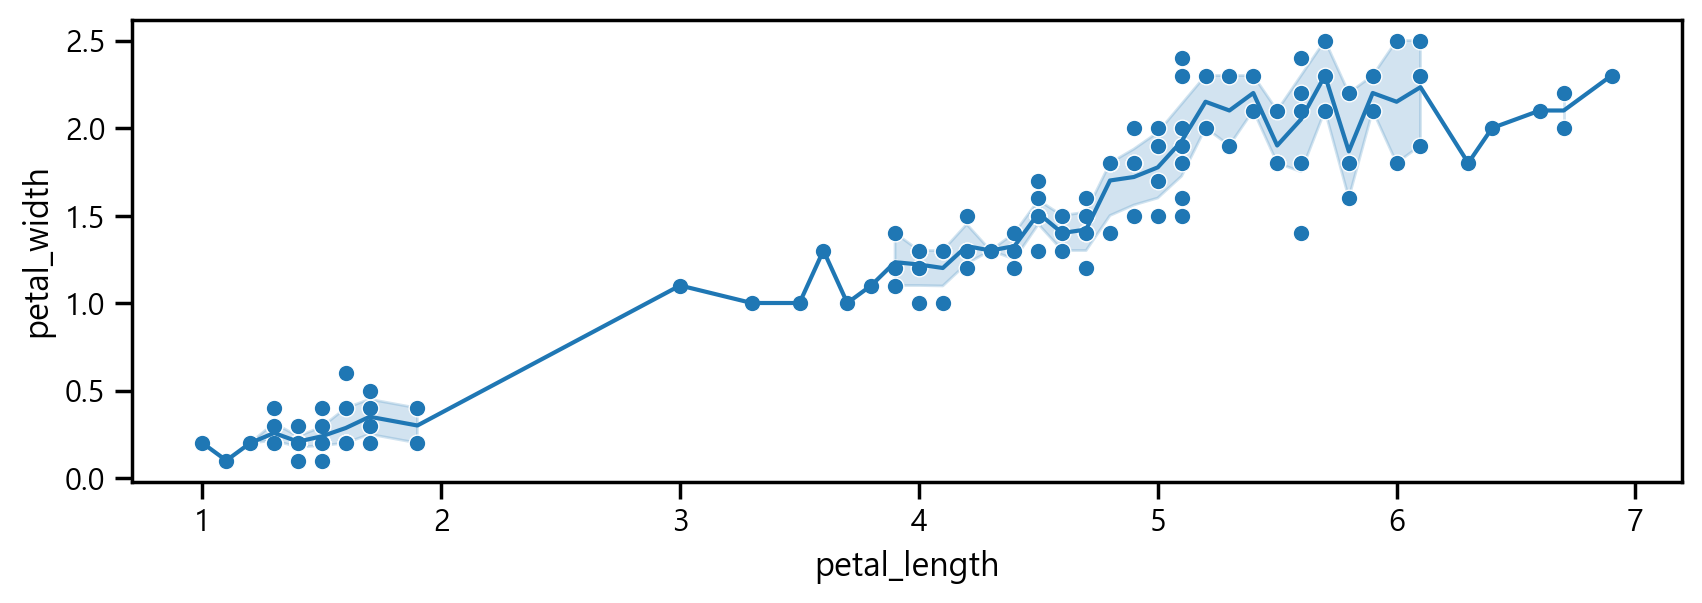

In [8]:
plt.figure(figsize=(10,3))
# sns.set(context='notebook') # 기본값(1.0), paper(0.8), talk(1.3), poster(1.8)
sns.set_context('notebook')
sns.lineplot(data=iris, x='petal_length', y='petal_width')
sns.scatterplot(data=iris, x='petal_length', y='petal_width')
plt.show()

### 3) 컬러 팔레트
- https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
- https://matplotlib.org/tutorials/colors/colormaps.html
- https://seaborn.pydata.org/tutorial/color_palettes.html

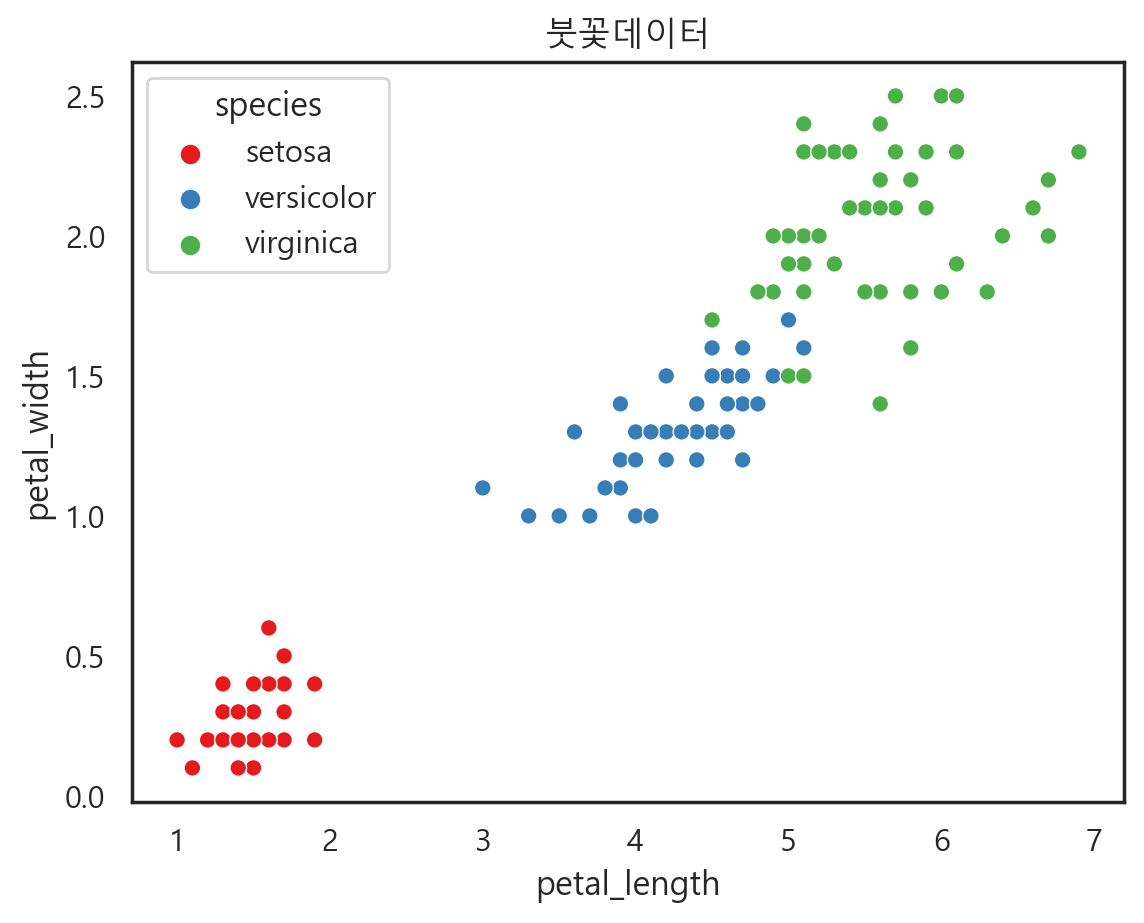

In [9]:
sns.set(palette='Pastel1', style='white', context='notebook') # 기본 미적 속성 설정
plt.rc("font", family="Malgun Gothic") # windows
plt.rc("axes", unicode_minus=False) # y축 - 처리
ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width', 
                     hue='species', palette='Set1')
ax.set_title('붓꽃데이터')
plt.show()

In [10]:
sns.set(style='darkgrid',
       context='notebook',
       palette='Dark2',
       rc={'figure.figsize':(10,3)})

## 3.3 Seaborn 함수로 그래프 그리기
### 1) 관계형 그래프
    * scatterplot, lineplot, relplot(서브플롯제공)

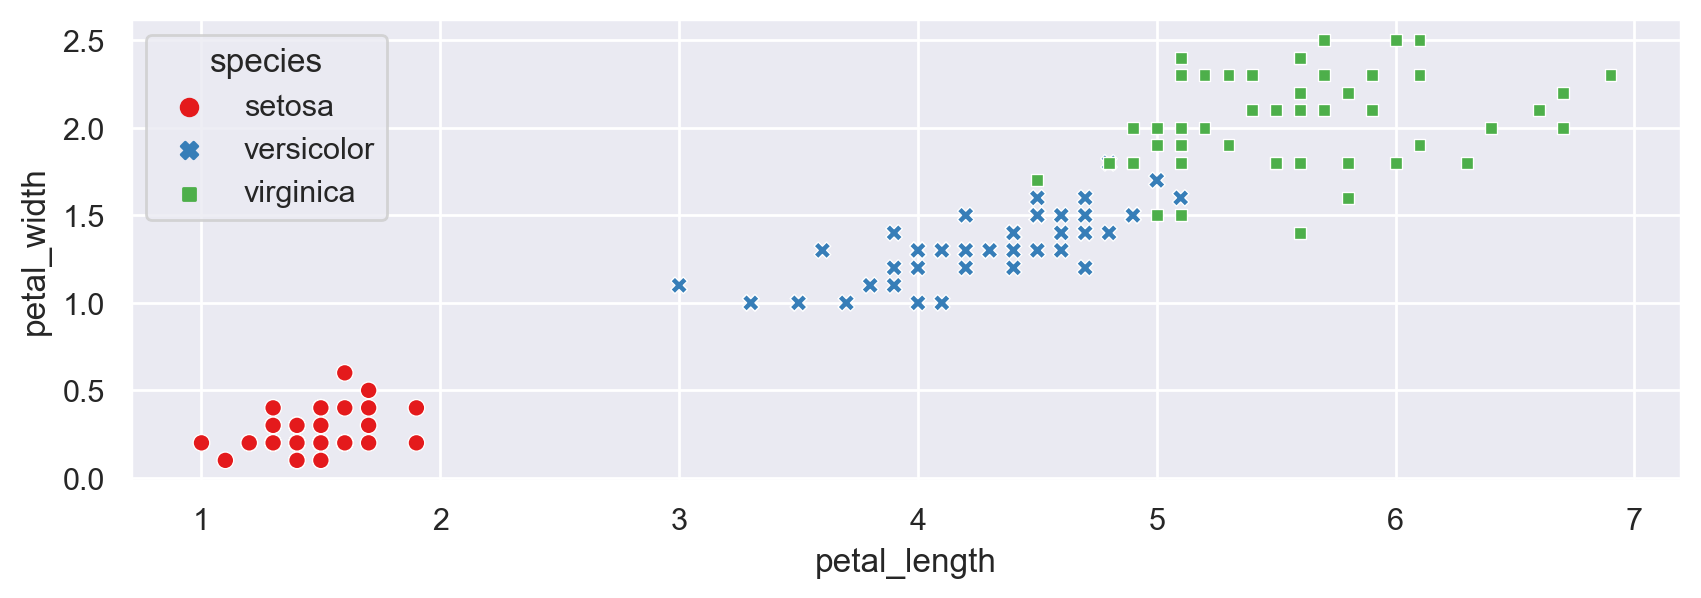

In [11]:
# 종별 다른 색상과 다른 스타일의 scatterplot
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species',
               palette='Set1', style='species')
plt.show()

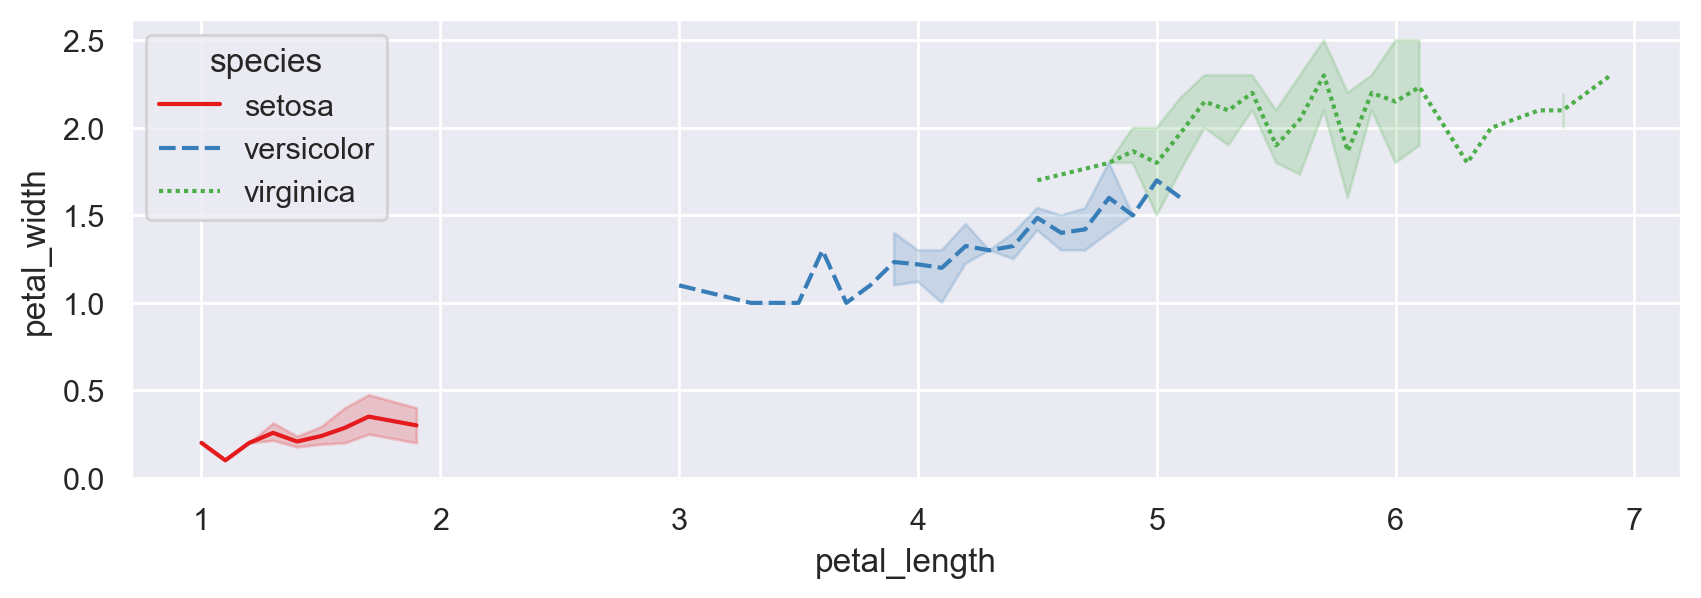

In [22]:
# 종별 다른 색상과 스타일의 lineplot
sns.lineplot(data=iris, x='petal_length', y='petal_width', hue='species',
            style='species', palette='Set1')
plt.show()

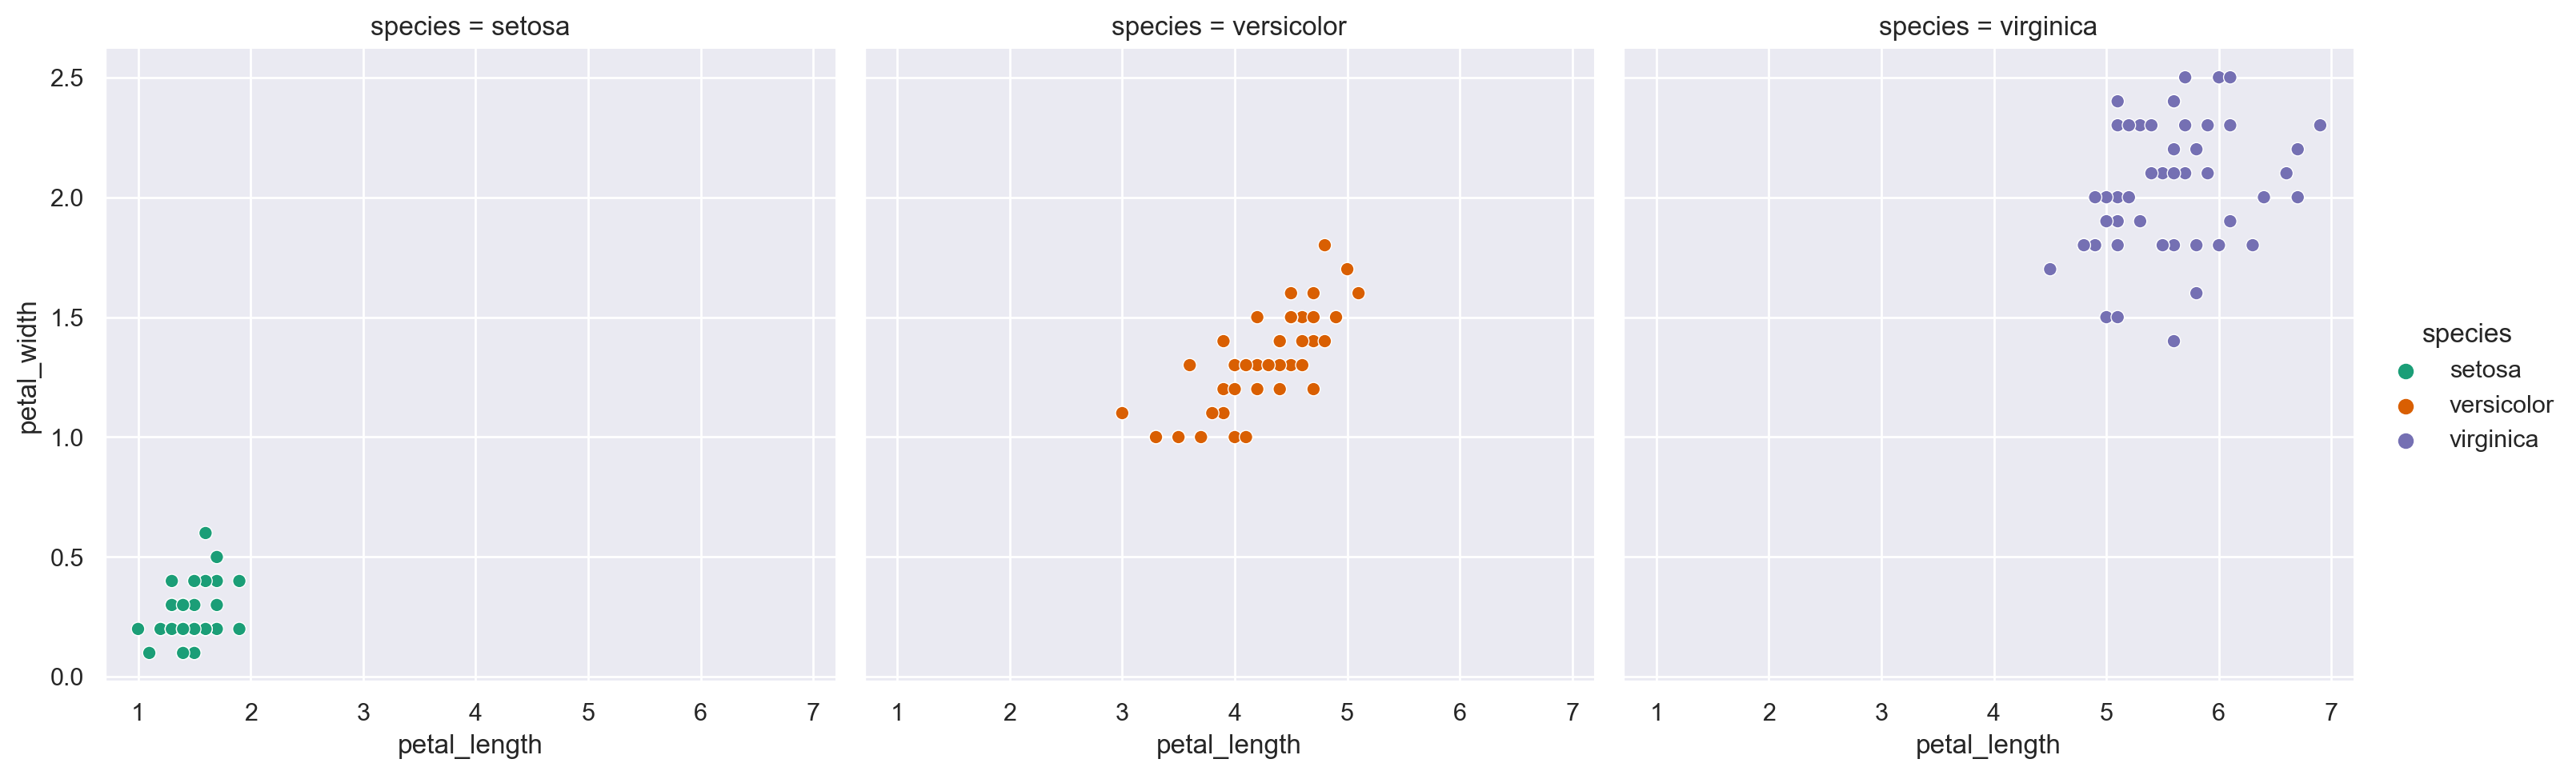

In [28]:
# 종별 lineplot을 서브플롯으로 => relplot(관계형 그래프에서 서브플롯 그리는 함수)
sns.relplot(data=iris, x='petal_length', y='petal_width', hue='species',
           #kind='line', # 서브플롯으로 그려질 그래프 종류(기본값:scatter)
           col='species', # col단위로 서브플롯 표현
        #   col_wrap=2 # 한줄에 표현될 서브플롯 수
        )
plt.show()

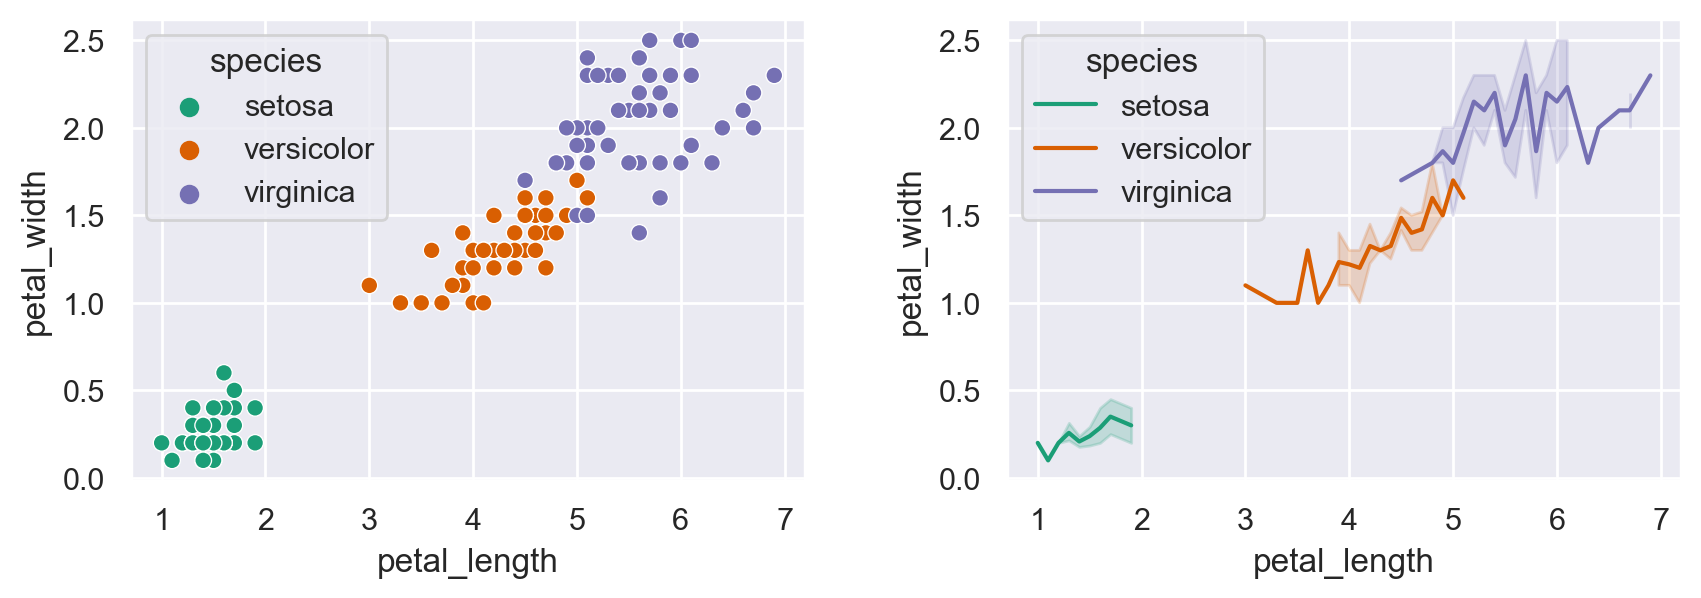

In [33]:
# ax[0]에는 산점도, ax[1]에는 lineplot
fig, ax = plt.subplots(ncols=2)
plt.subplots_adjust(wspace=0.3) # 서브플롯 사이의 공백 조정
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', ax=ax[0])
sns.lineplot(data=iris, x='petal_length', y='petal_width', hue='species', ax=ax[1])
plt.show()

### 2) 범주형 그래프
- stripplot, swarmplot, barplot, barhplot, countplot, pointplot, 
- boxplot, violinplot, boxenplot => catplot(서브플롯)

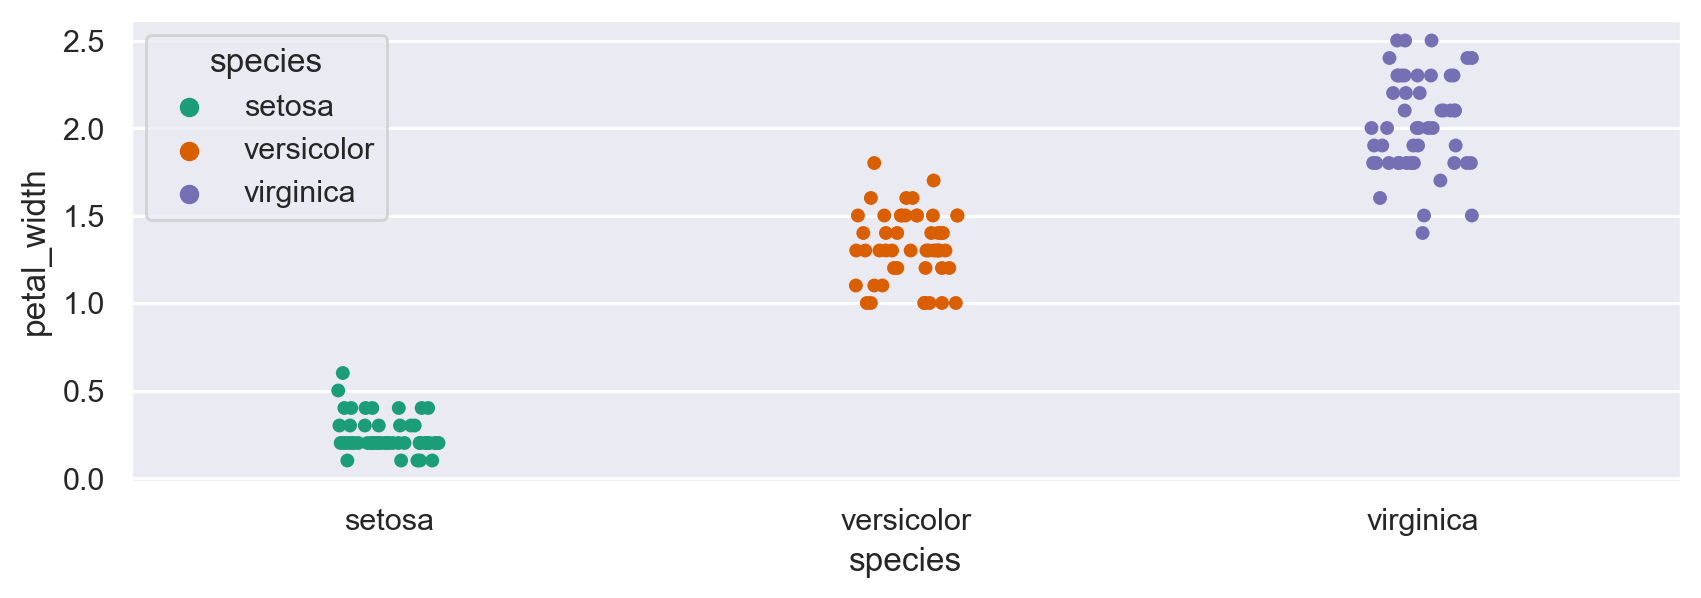

In [41]:
# x축이 범주형일때의 산점도(중첩된 점)
sns.stripplot(data=iris, x='species', y='petal_width', hue='species')
# hue속성이 있을 경우 palette 가능
plt.show()

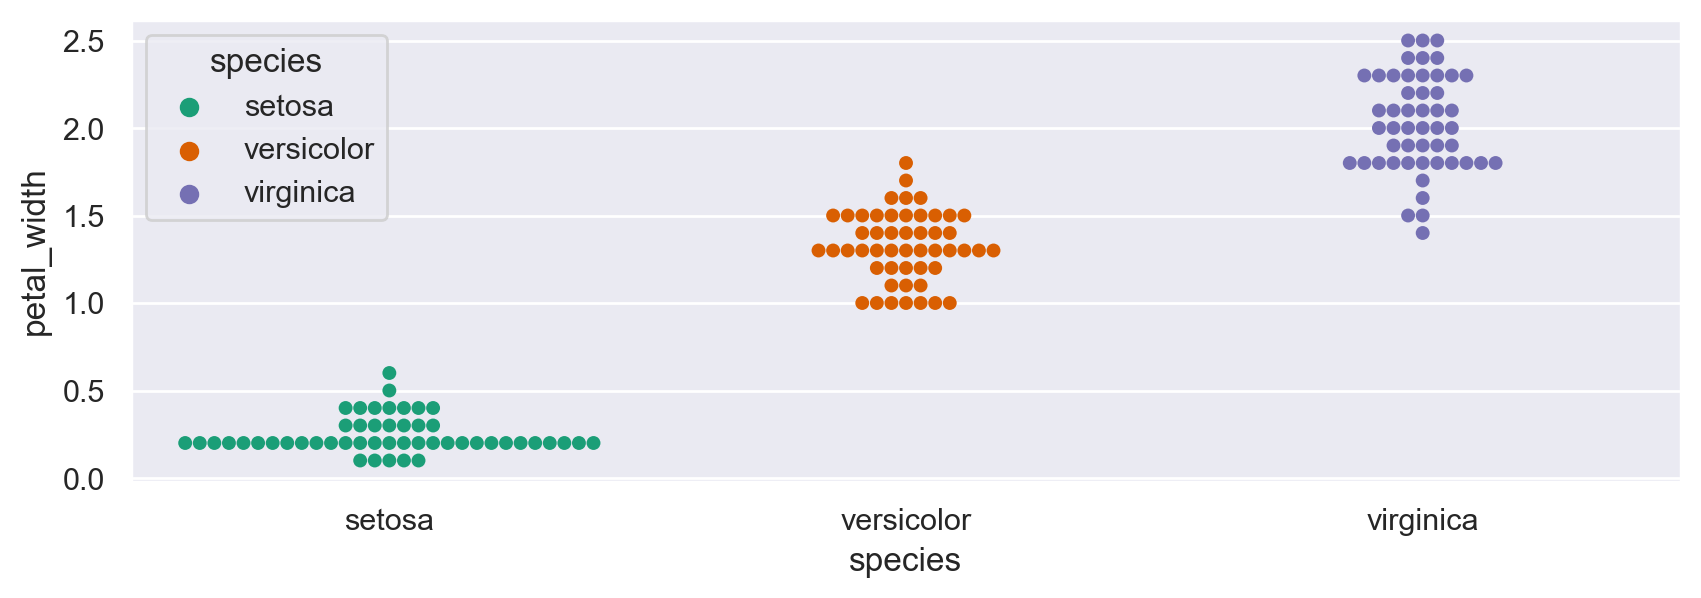

In [44]:
# x축이 범주형일때의 산점도(중첩되지 않게)
sns.swarmplot(data=iris, x='species', y='petal_width', hue='species')
plt.show()

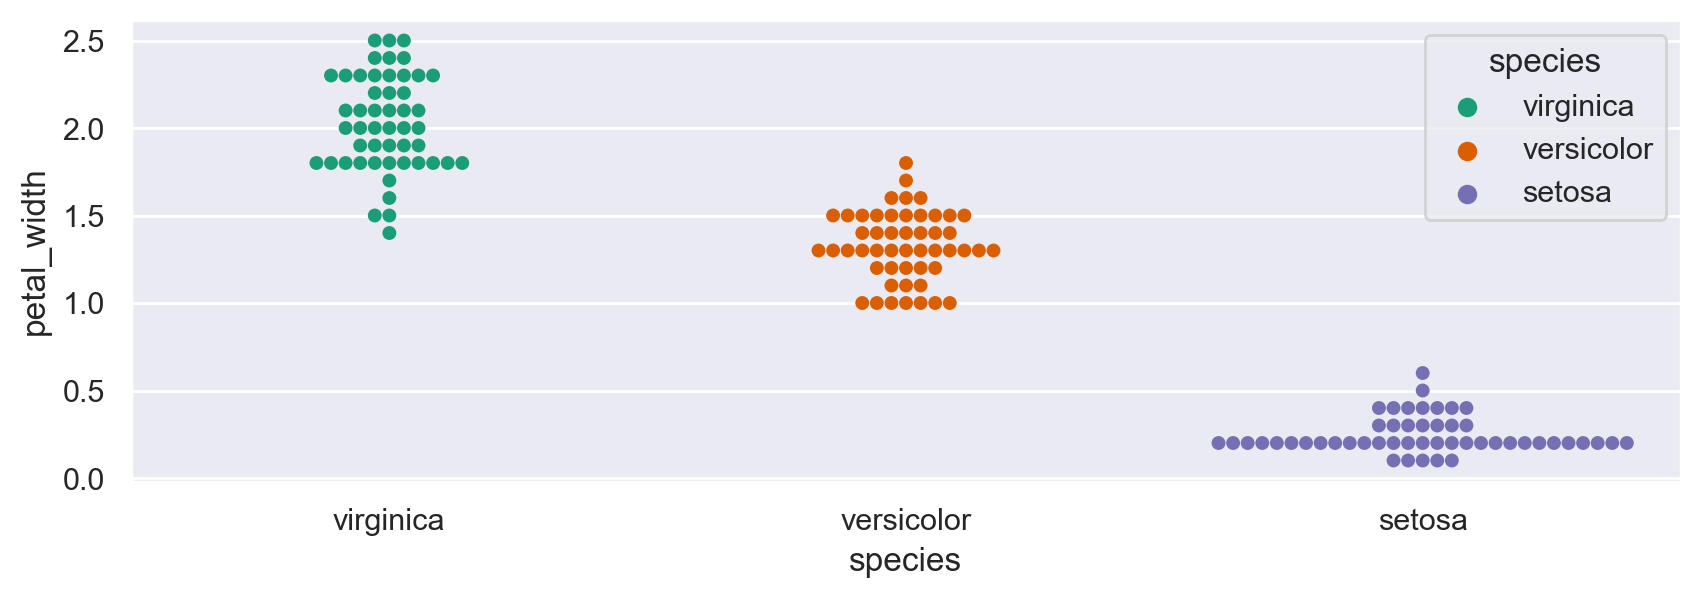

In [46]:
# 내림차순 정렬된 iris로 범주형 산점도
sns.swarmplot(data=iris.sort_values('petal_width', ascending=False), 
              x='species', y='petal_width', hue='species')
plt.show()

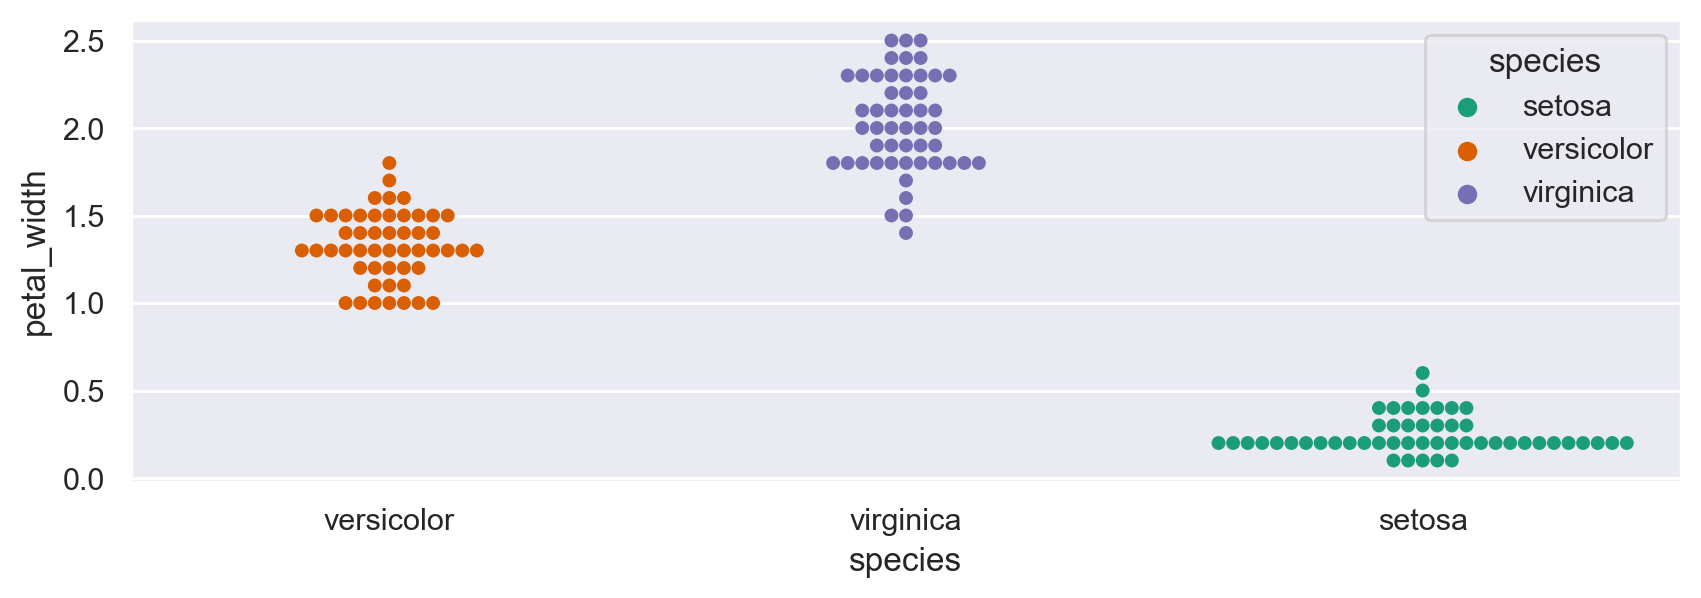

In [47]:
# 산점도의 x축 순서를 임의로 정할 수 있음
sns.swarmplot(data=iris, 
              x='species', y='petal_width', hue='species',
             order=['versicolor', 'virginica','setosa'])
plt.show()

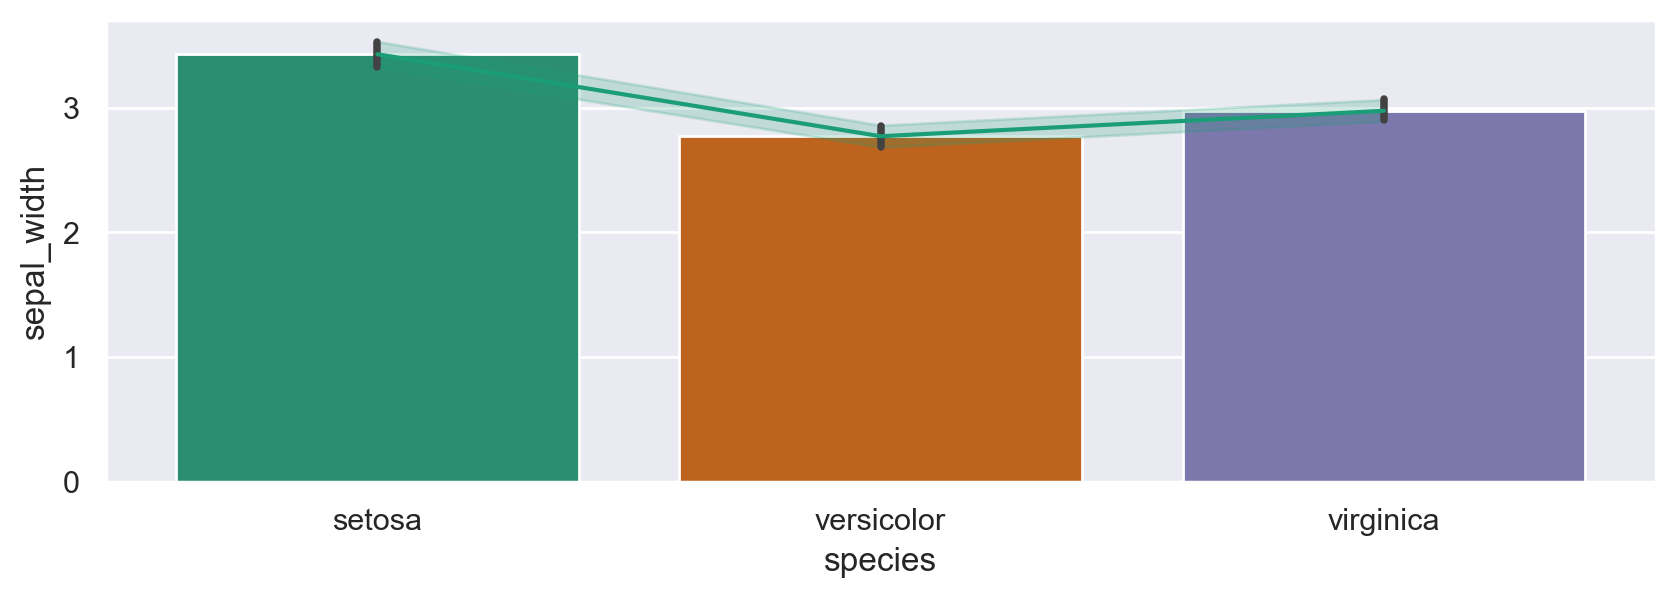

In [12]:
# barplot : 각 범주별 평균값과 그에 대한 신뢰구간
#           신뢰구간 제외 : ci(confidence interval)=None, errorbar=None
sns.barplot(data=iris, x='species', y='sepal_width', 
           # errorbar=None
           )
sns.lineplot(data=iris, x='species', y='sepal_width')
plt.show()

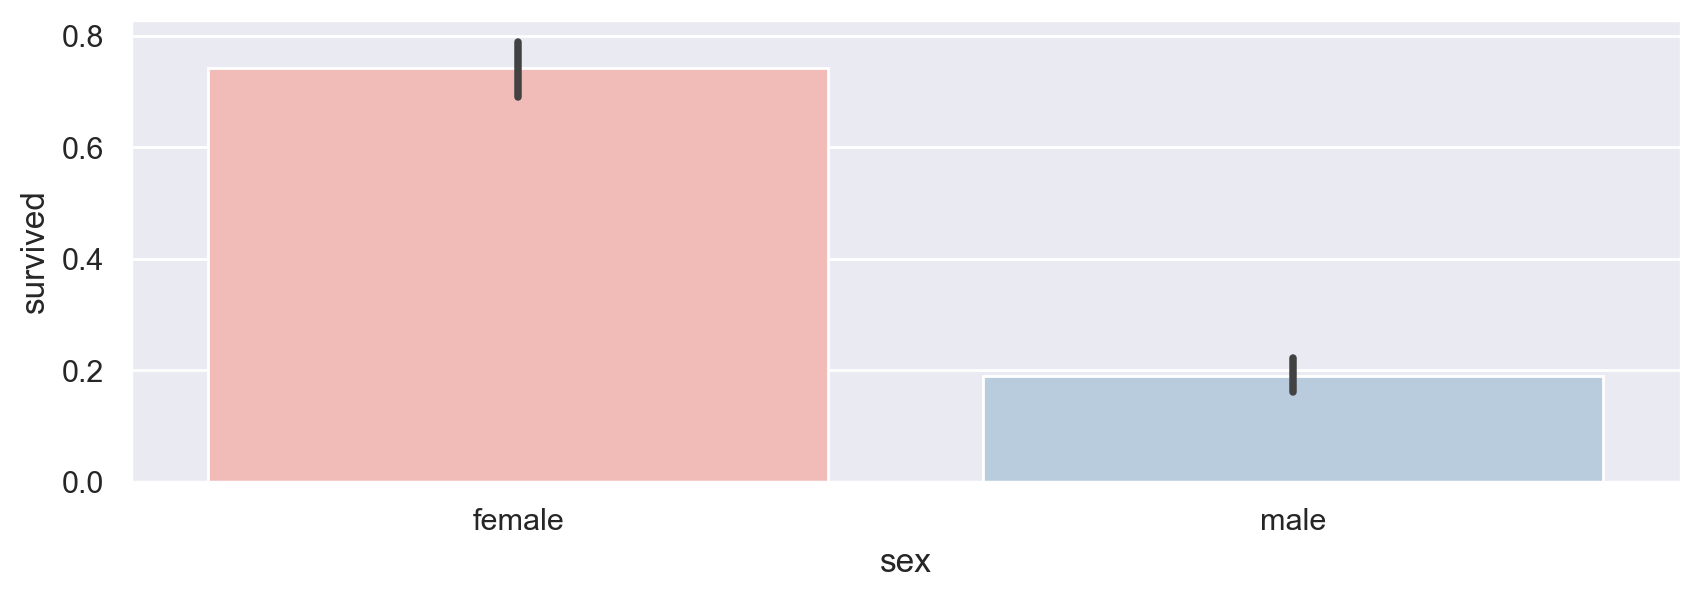

In [13]:
# 성별 servived의 평균을 막대그래프
sns.barplot(data=titanic, x='sex', y='survived', 
            order=['female','male'],
            palette='Pastel1')
plt.show()

In [68]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


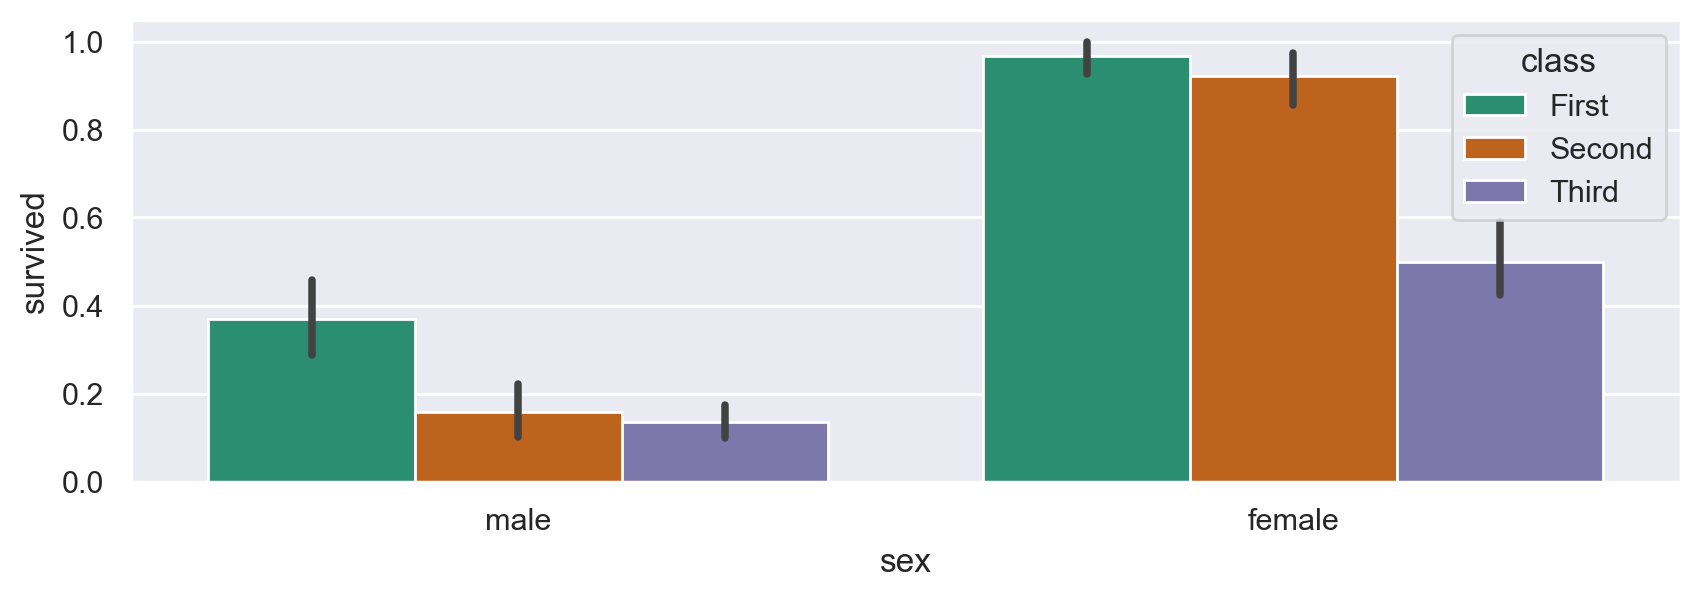

In [70]:
# class별로 성별 생존률을 하나의 막대그래프
sns.barplot(data=titanic, x='sex', y='survived', hue='class')
plt.show()

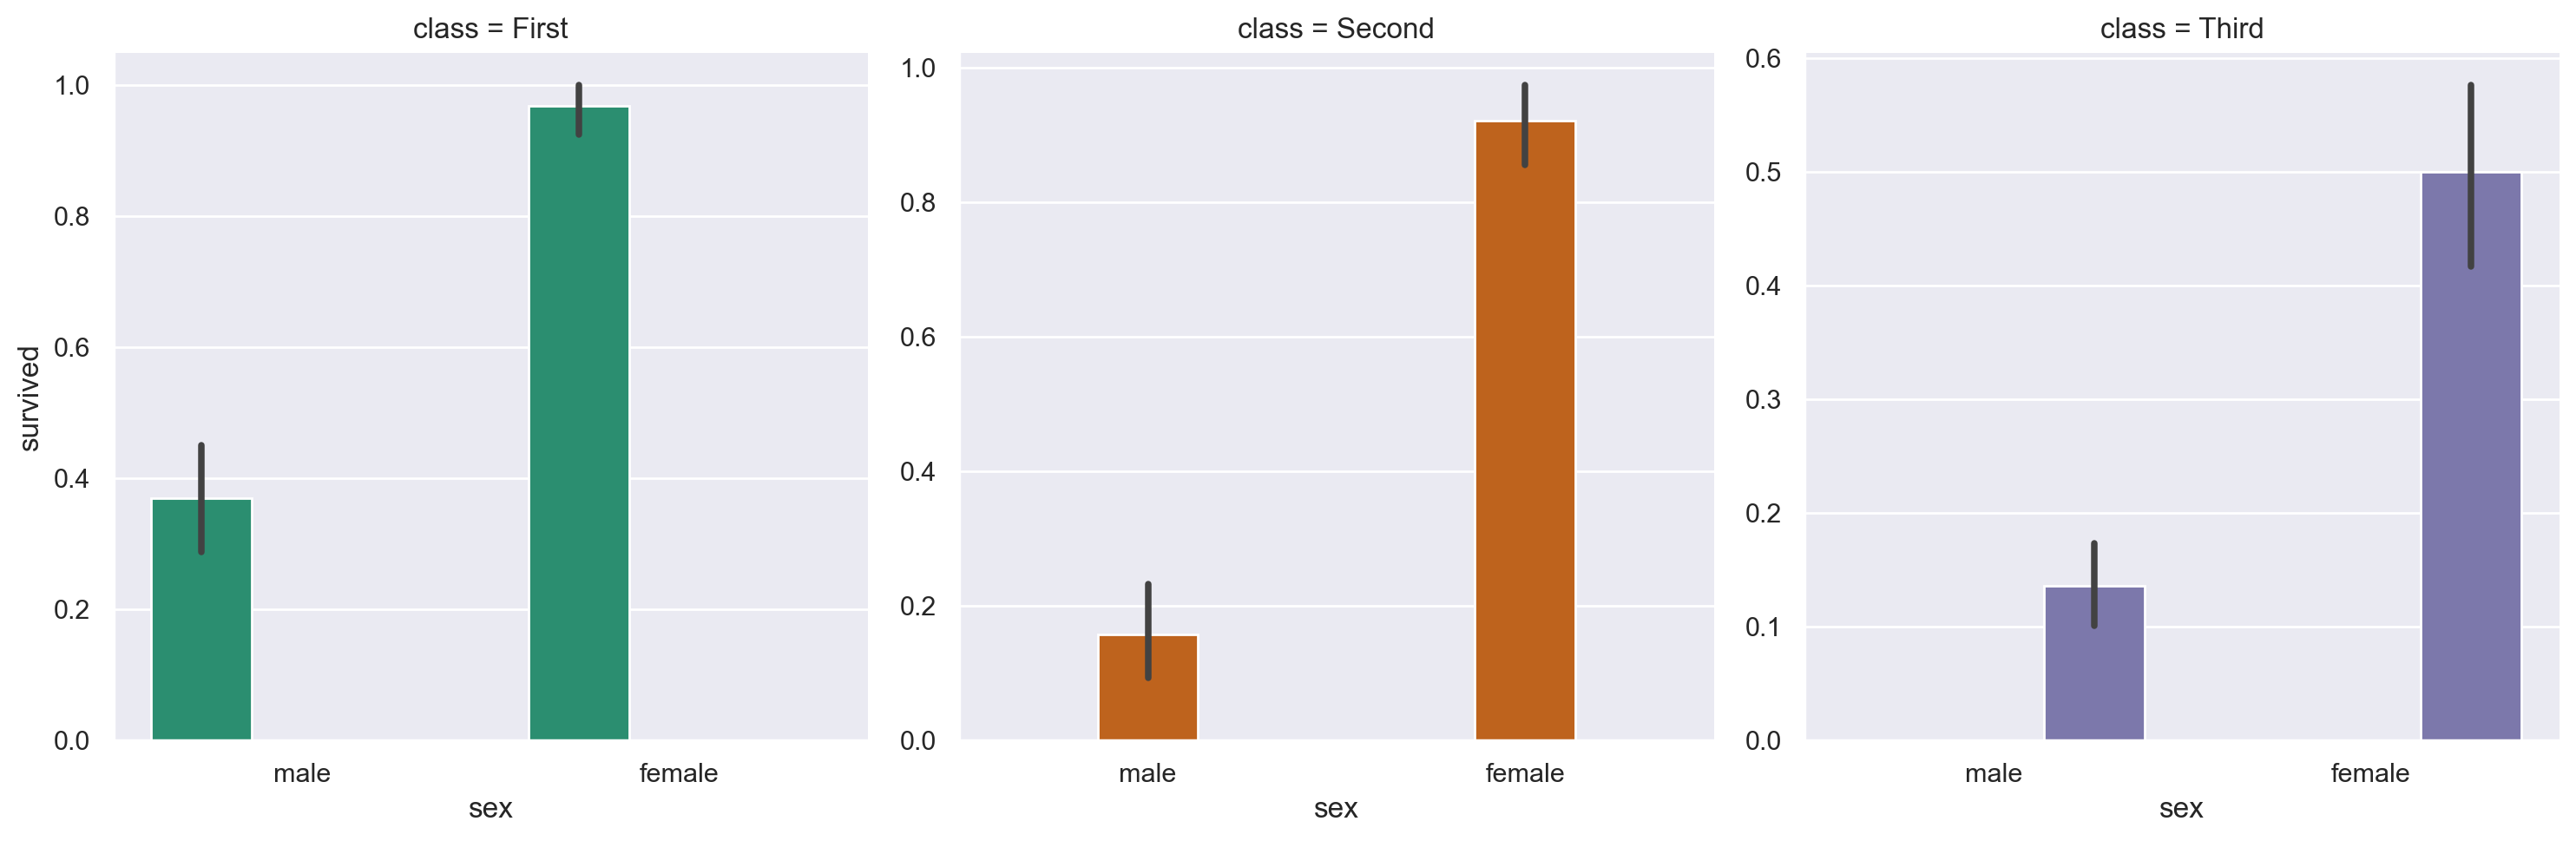

In [74]:
# class별로 성별 생존률을 서브플롯(막대그래프)
sns.catplot(data=titanic, x='sex', y='survived', hue='class',
           kind='bar', # 기본값은 stripplot
           col='class', # col단위로 서브플롯 표현
           sharey=False, # y축 공유안함 
           #col_wrap=2, 기본값은 한행에 모든 서브플롯 표현
           )

In [78]:
titanic.deck.unique() # 데이터 종류들

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [100]:
titanic.deck.value_counts() # 범주별 데이터 갯수

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

<Axes: xlabel='deck', ylabel='count'>

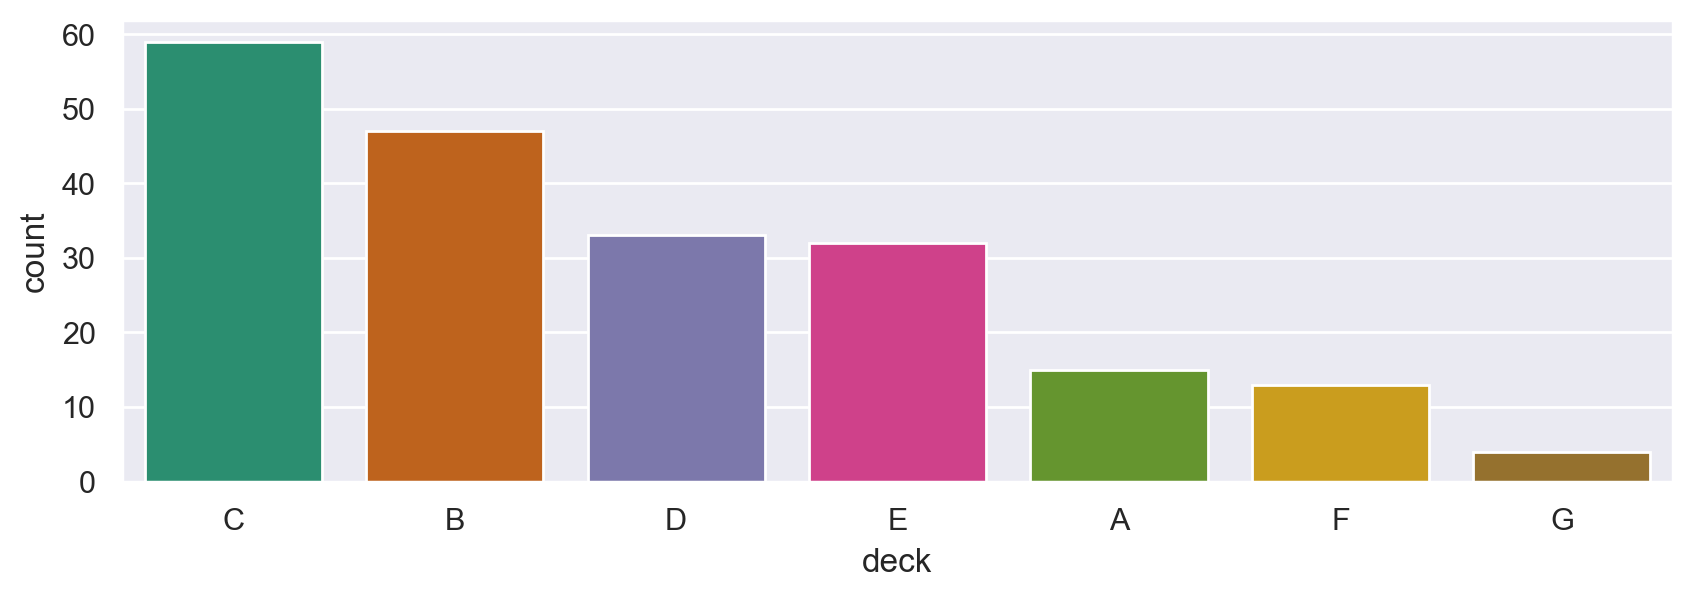

In [114]:
result = titanic.deck.value_counts() 
# result.index
# deck별 관측수(내림차순정렬)를 막대그래프 (countplot)
sns.countplot(data=titanic, x='deck', order=result.index)

<Axes: xlabel='deck', ylabel='count'>

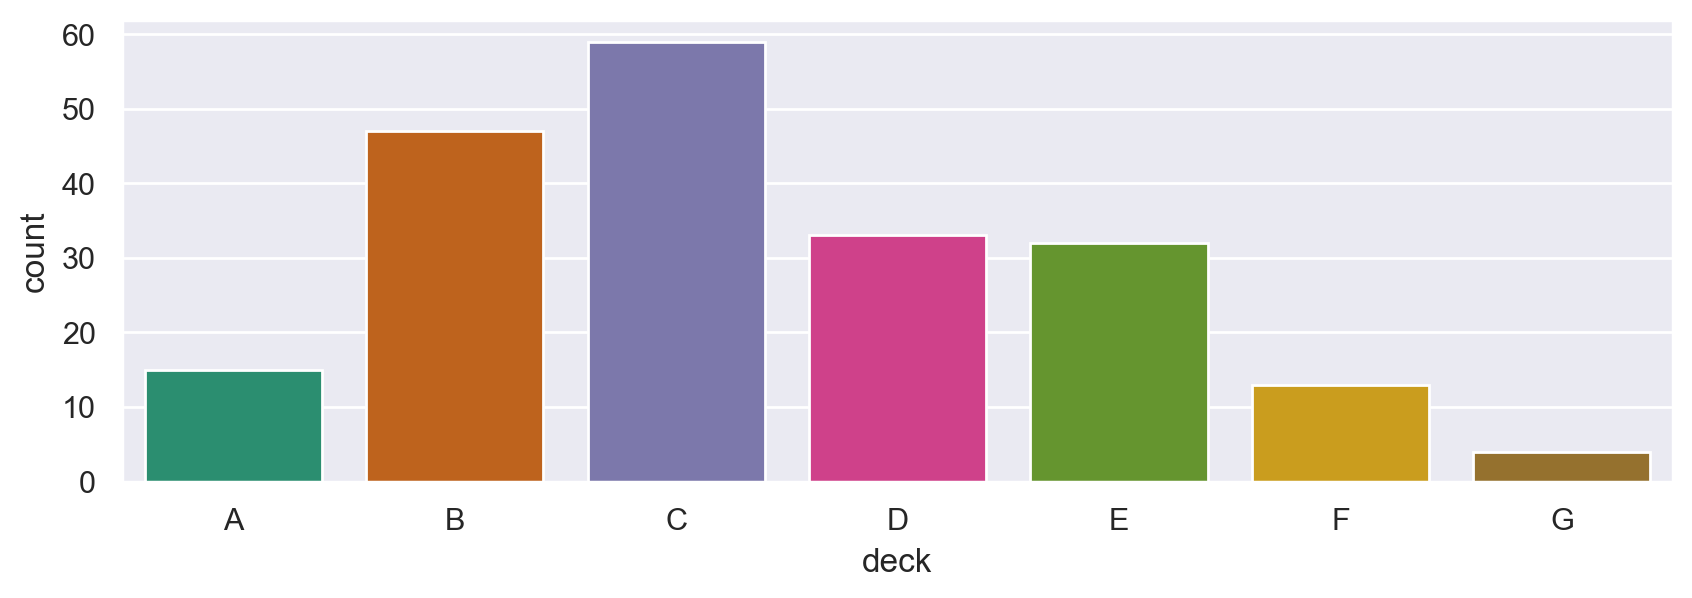

In [92]:
# deck별 관측수를 막대그래프 (countplot)
sns.countplot(data=titanic, x='deck')

<Axes: xlabel='class', ylabel='survived'>

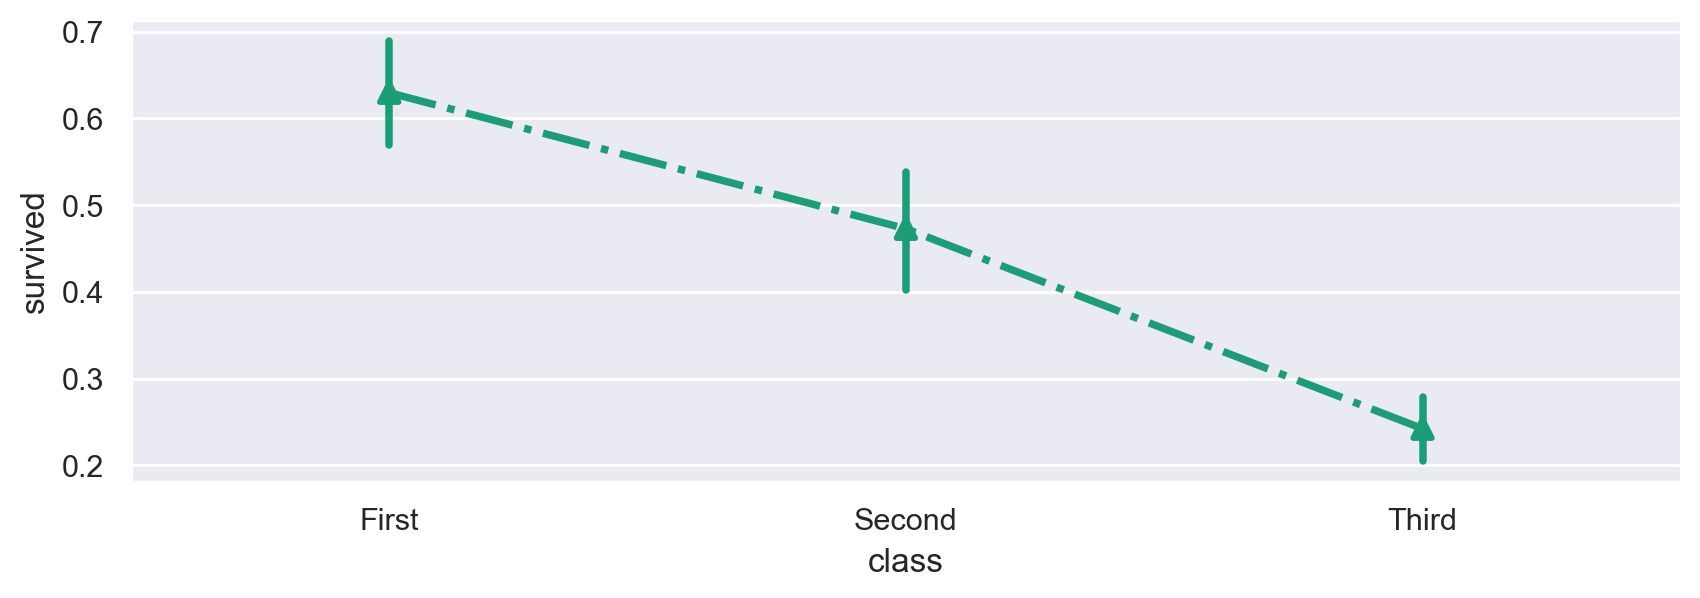

In [103]:
# class 별로 survived값을 pointplot
sns.pointplot(data=titanic, x='class', y='survived', 
             markers=['^'],
             linestyles=['-.'])

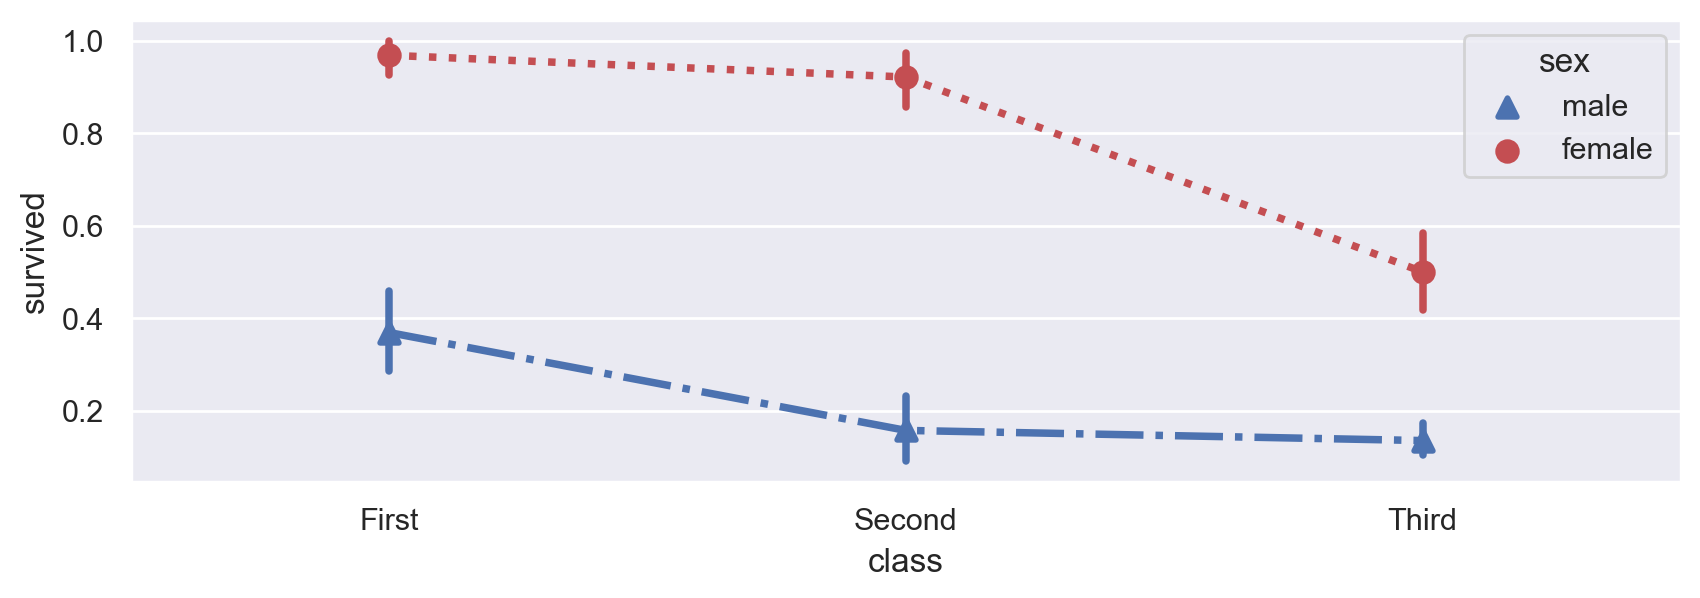

In [108]:
# class별, 성별 survived값을 pointplot
sns.pointplot(data=titanic, x='class', y='survived', hue='sex',
             markers=['^','o'],
             linestyles=['-.',':'],
             palette={'male':'b', 'female':'r'})
plt.show()

<Axes: xlabel='sex', ylabel='age'>

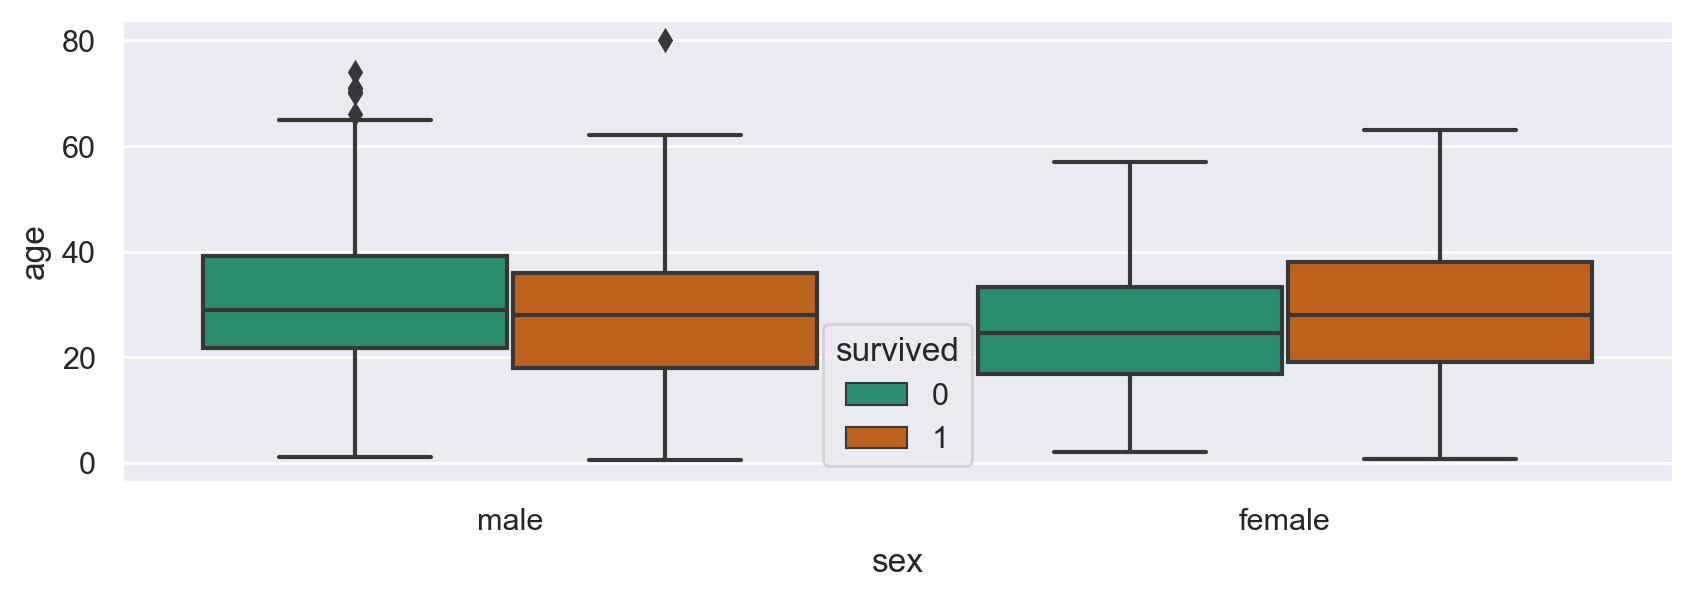

In [116]:
# boxplot
sns.boxplot(data=titanic, x='sex', y='age', hue='survived')

<Axes: xlabel='sex', ylabel='age'>

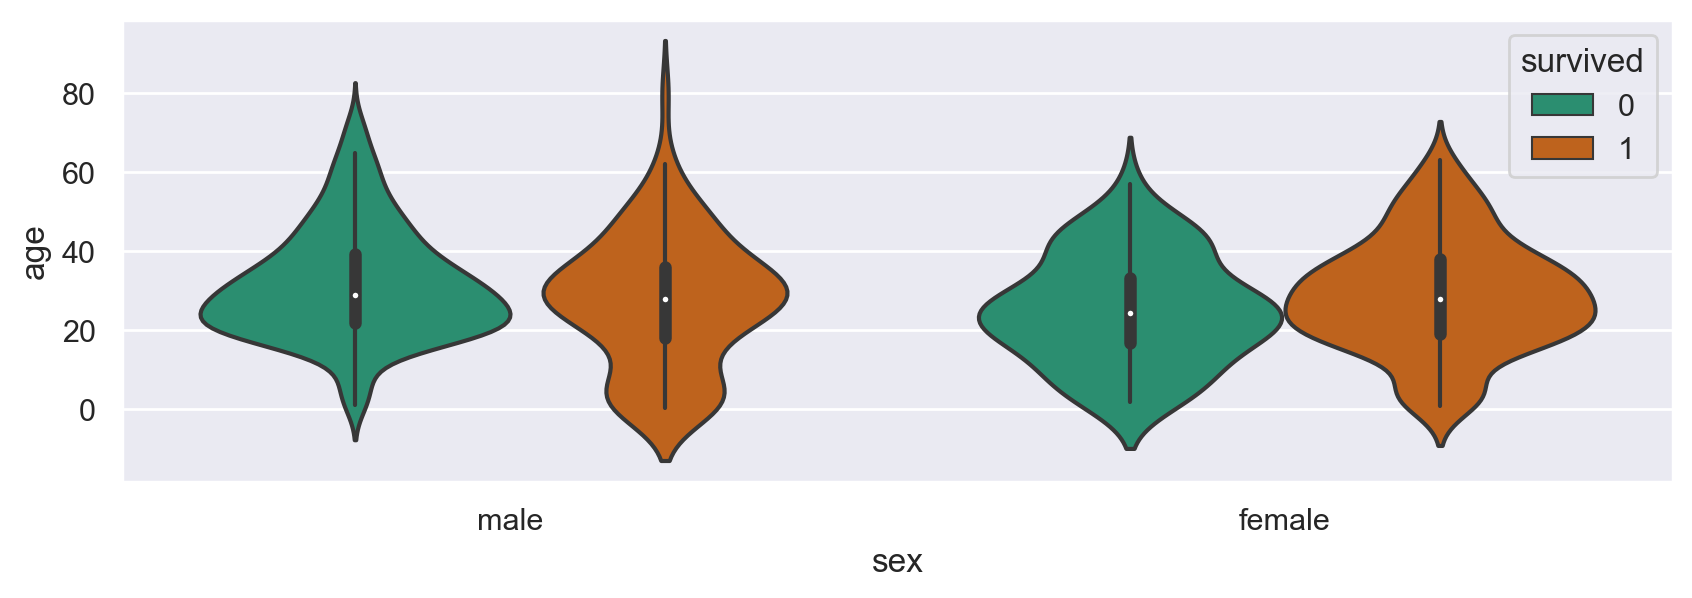

In [117]:
sns.violinplot(data=titanic, x='sex', y='age', hue='survived')

<Axes: xlabel='sex', ylabel='age'>

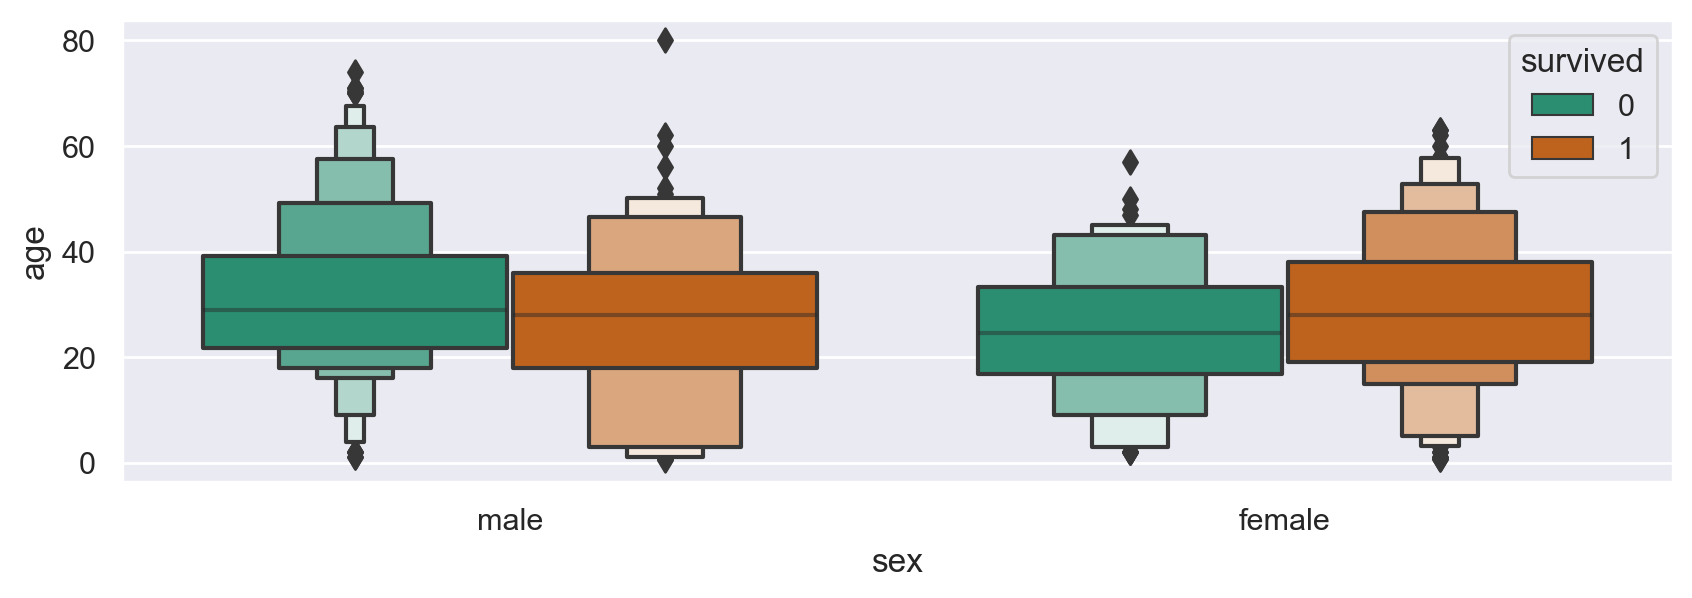

In [119]:
sns.boxenplot(data=titanic, x='sex', y='age', hue='survived')

<Axes: xlabel='age', ylabel='sex'>

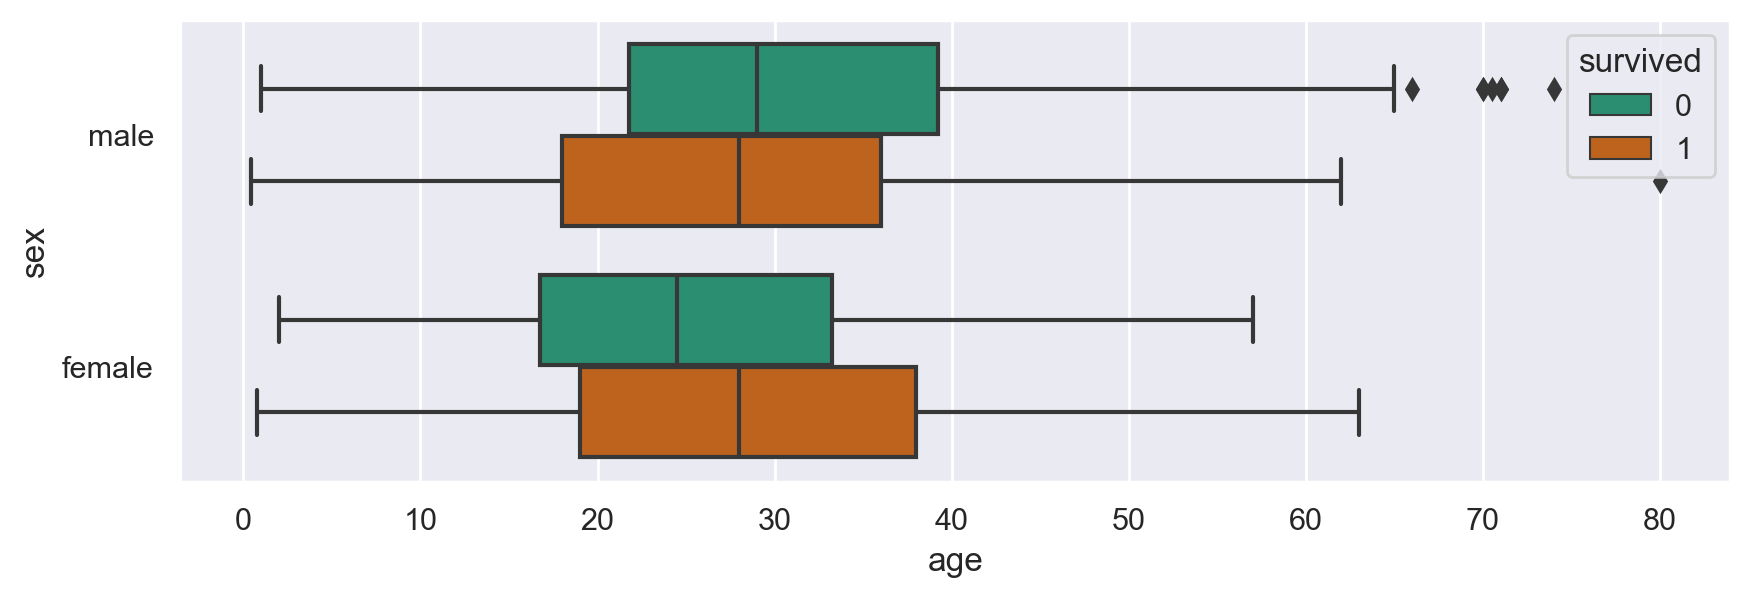

In [120]:
sns.boxplot(data=titanic, y='sex', x='age', hue='survived')

<Axes: xlabel='age', ylabel='sex'>

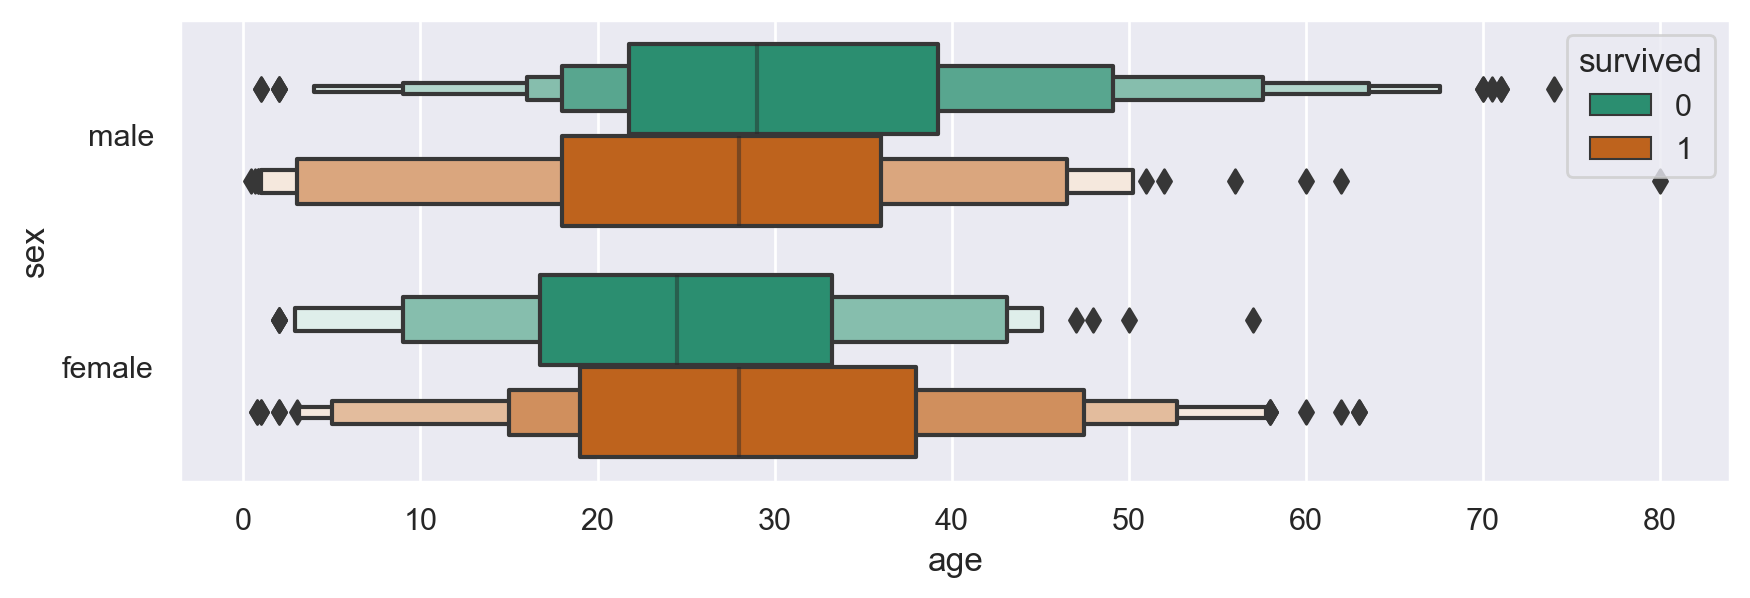

In [121]:
sns.boxenplot(data=titanic, y='sex', x='age', hue='survived')

### 3) 쌍관계 그래프
- pairplot : 데이터프레임에 포함된 모든 수치형 변수 쌍에 대해 산점도(scatterplot)와 히스토그램을 보여줌

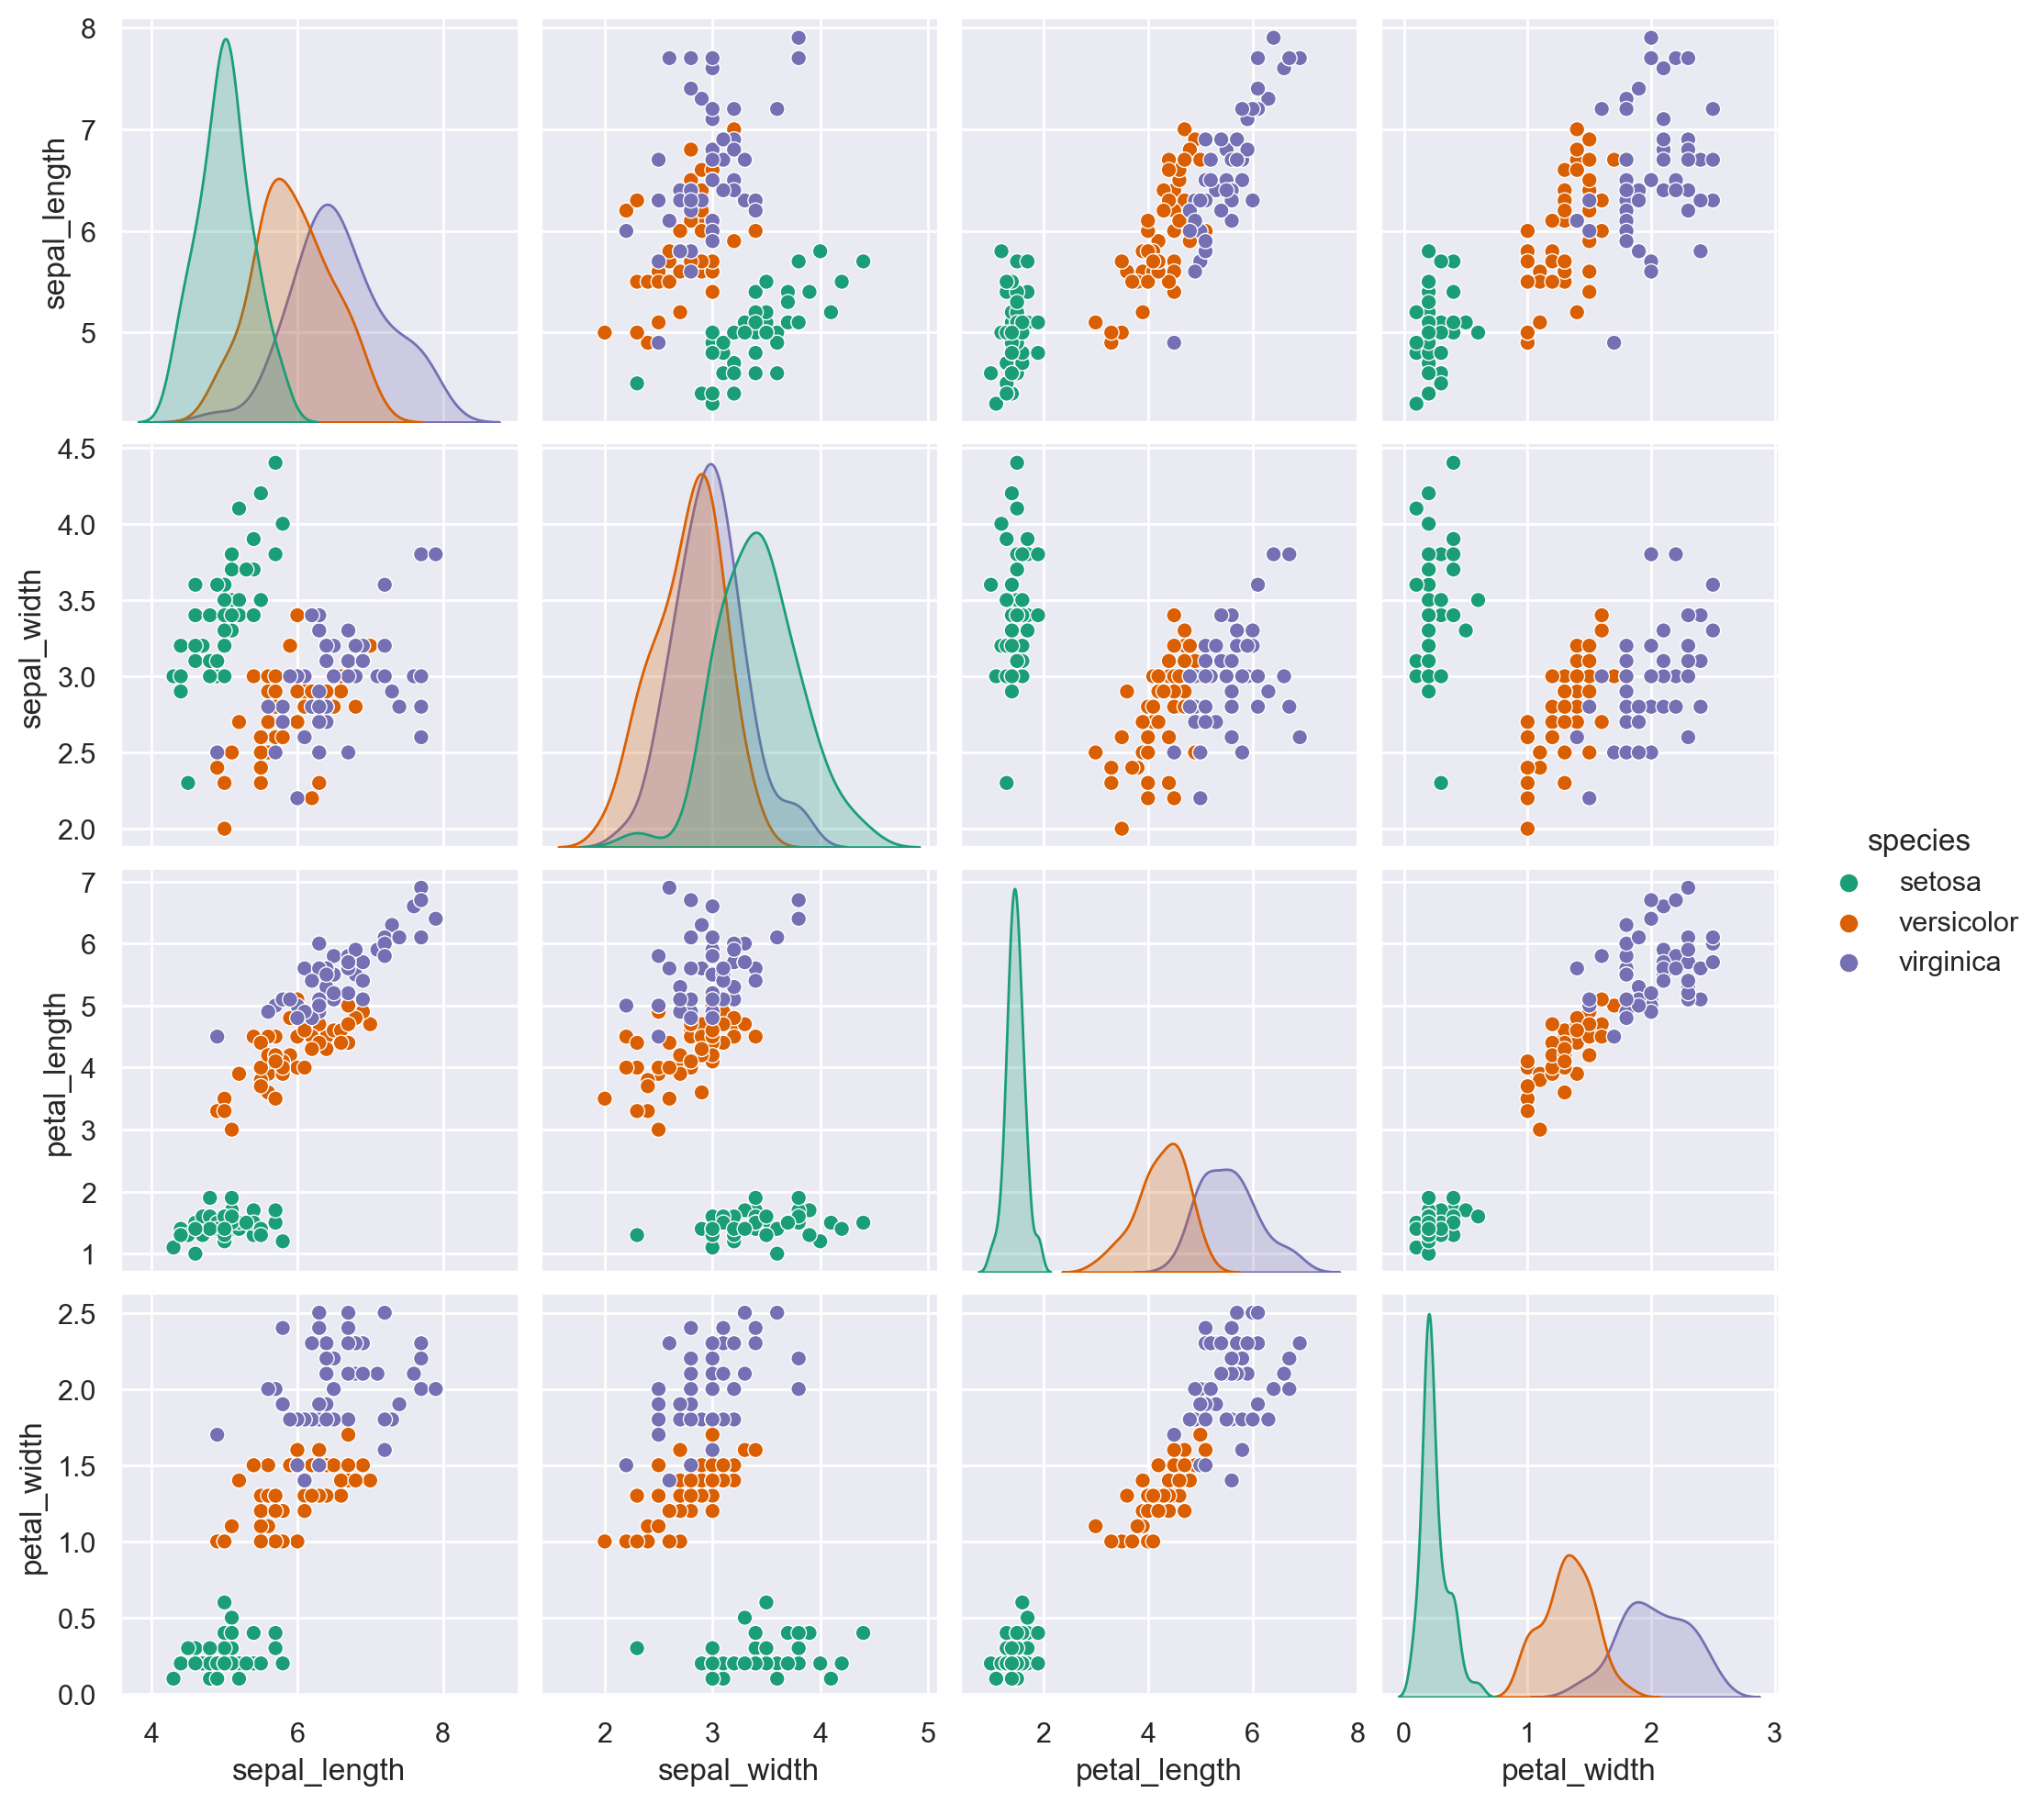

In [126]:
sns.pairplot(data=iris, hue='species')
plt.show()

### 4) 밀도그래프

In [130]:
import numpy as np
x = np.random.randn(10000) # 평균0, 표준편차1인 정규분포로 1000개 데이터를 배열

<Axes: ylabel='Count'>

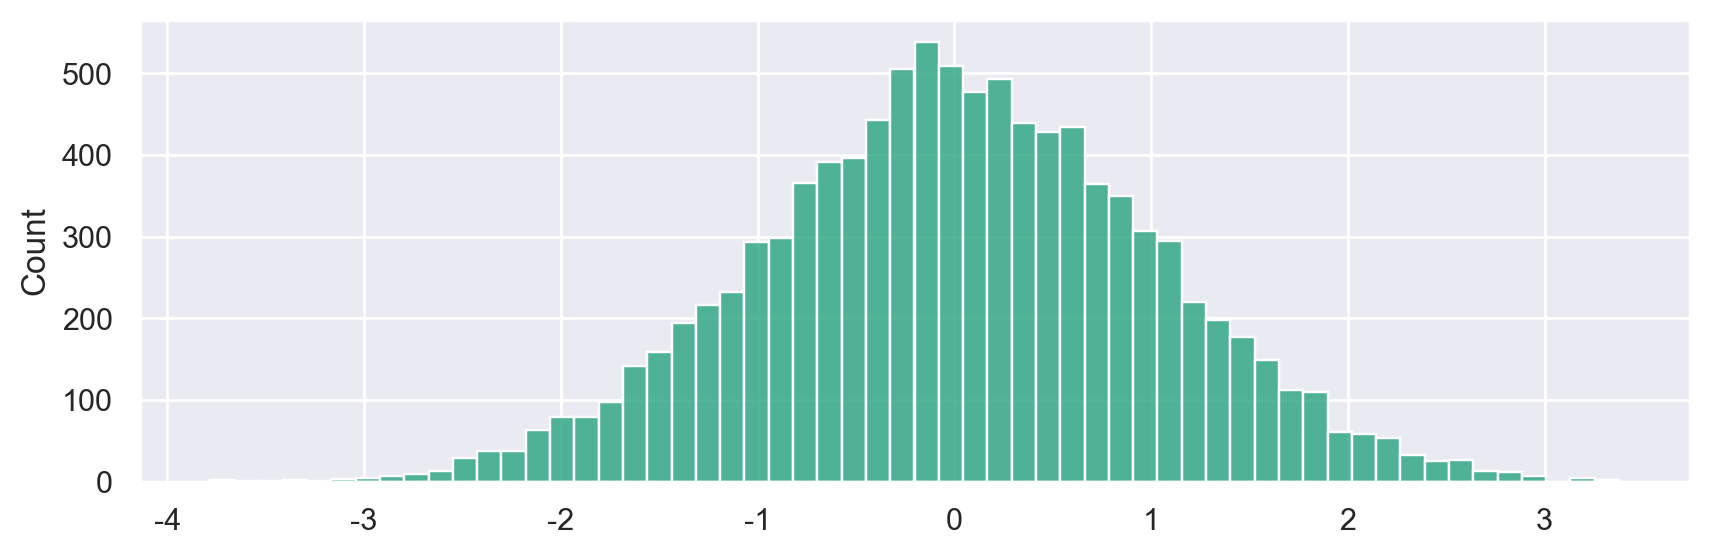

In [132]:
sns.histplot(x, kde=False) # kde(Kernel Density estimation)=False:분포를 매끄럽게

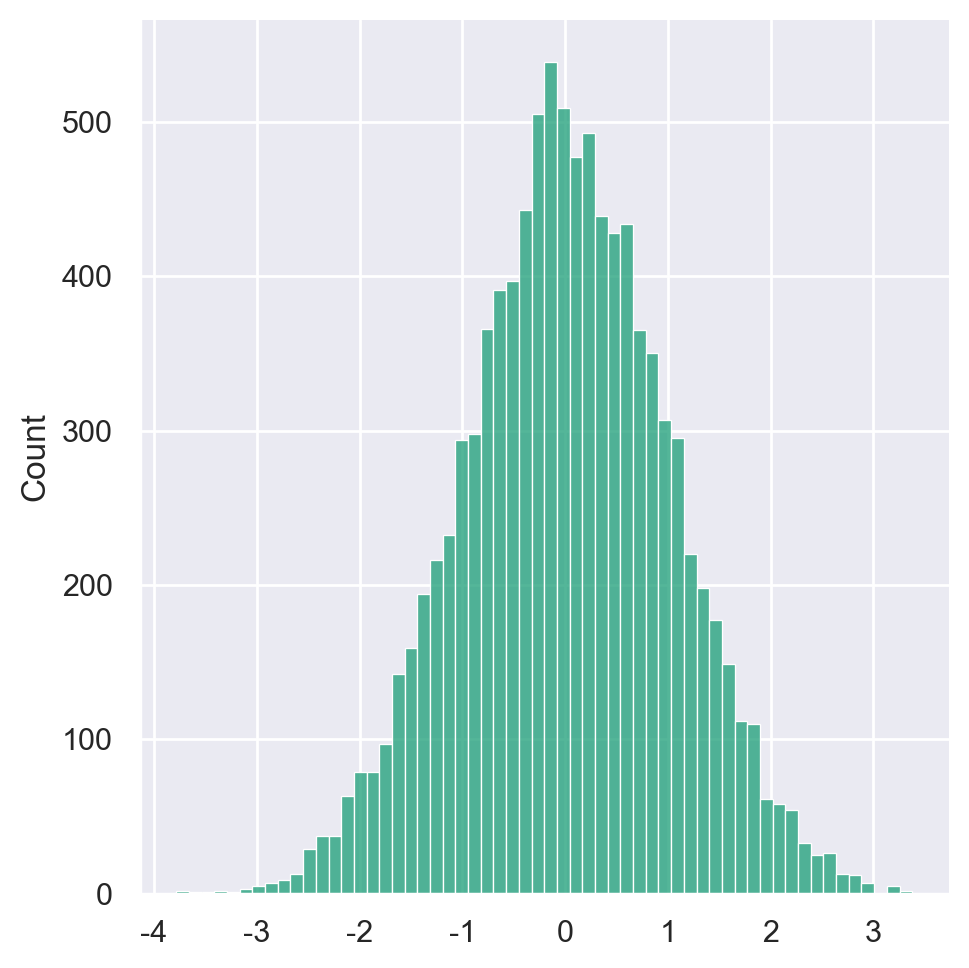

In [133]:
sns.displot(x)

### 5) 회귀 그래프

In [136]:
r = iris.corr(numeric_only=True)
r

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


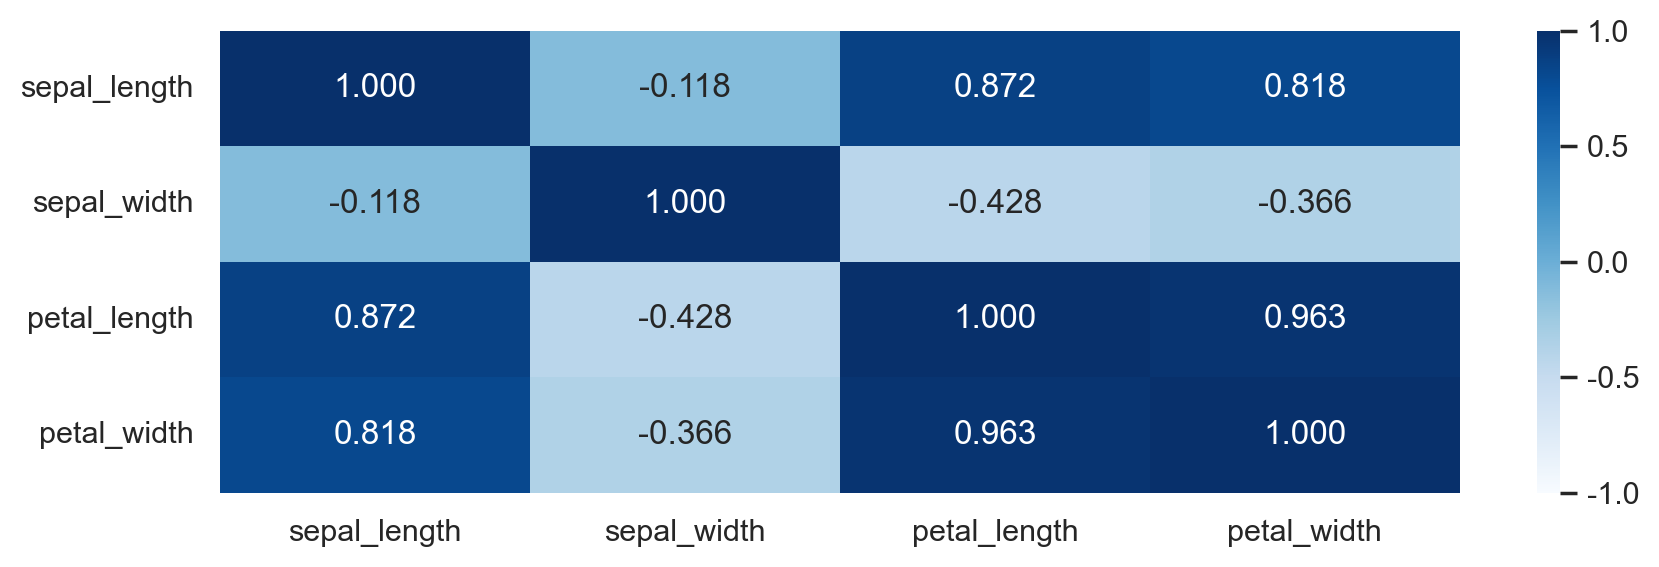

In [142]:
sns.heatmap(r, vmin=-1, vmax=1, annot=True, fmt='.3f', cmap='Blues')
plt.show()

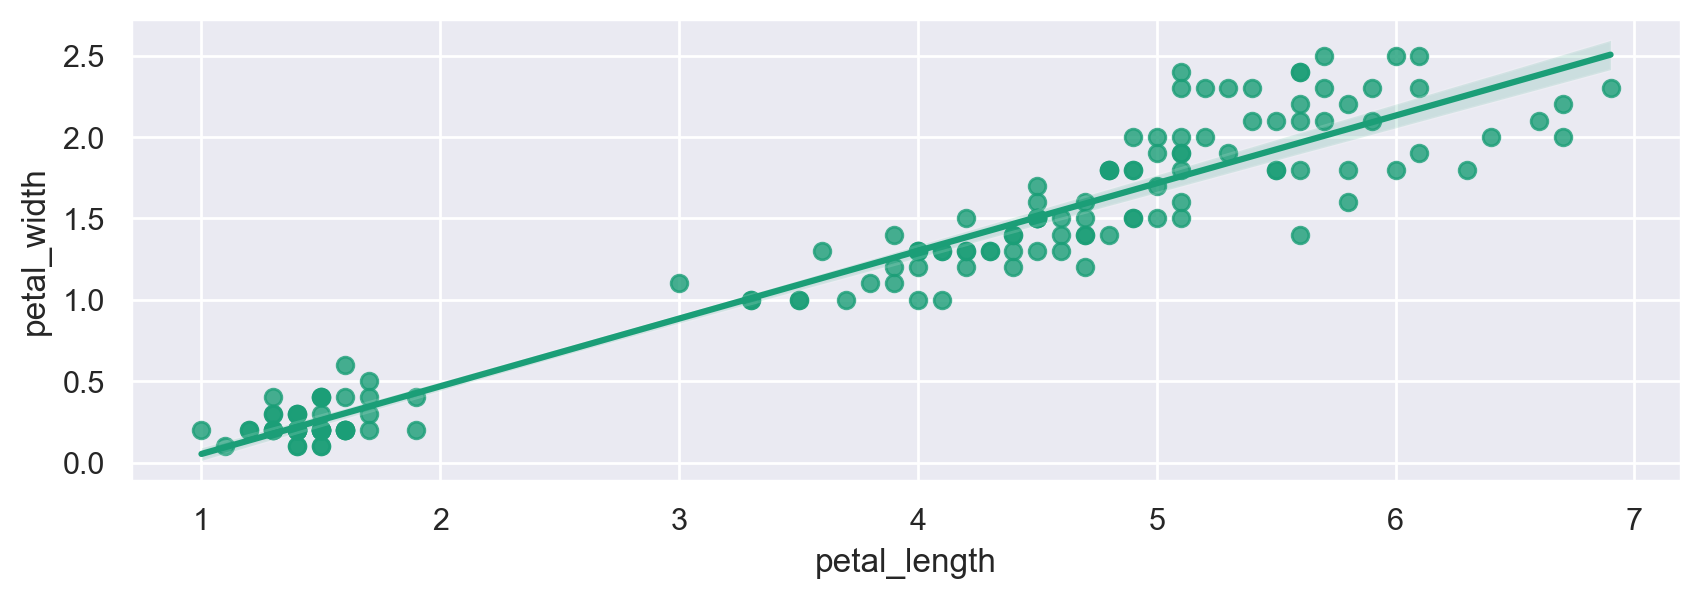

In [144]:
# 회귀 그래프 : regplot(hue 사용 불가), lmplot(hue사용 가능)
sns.regplot(data=iris, x='petal_length', y='petal_width')
plt.show()

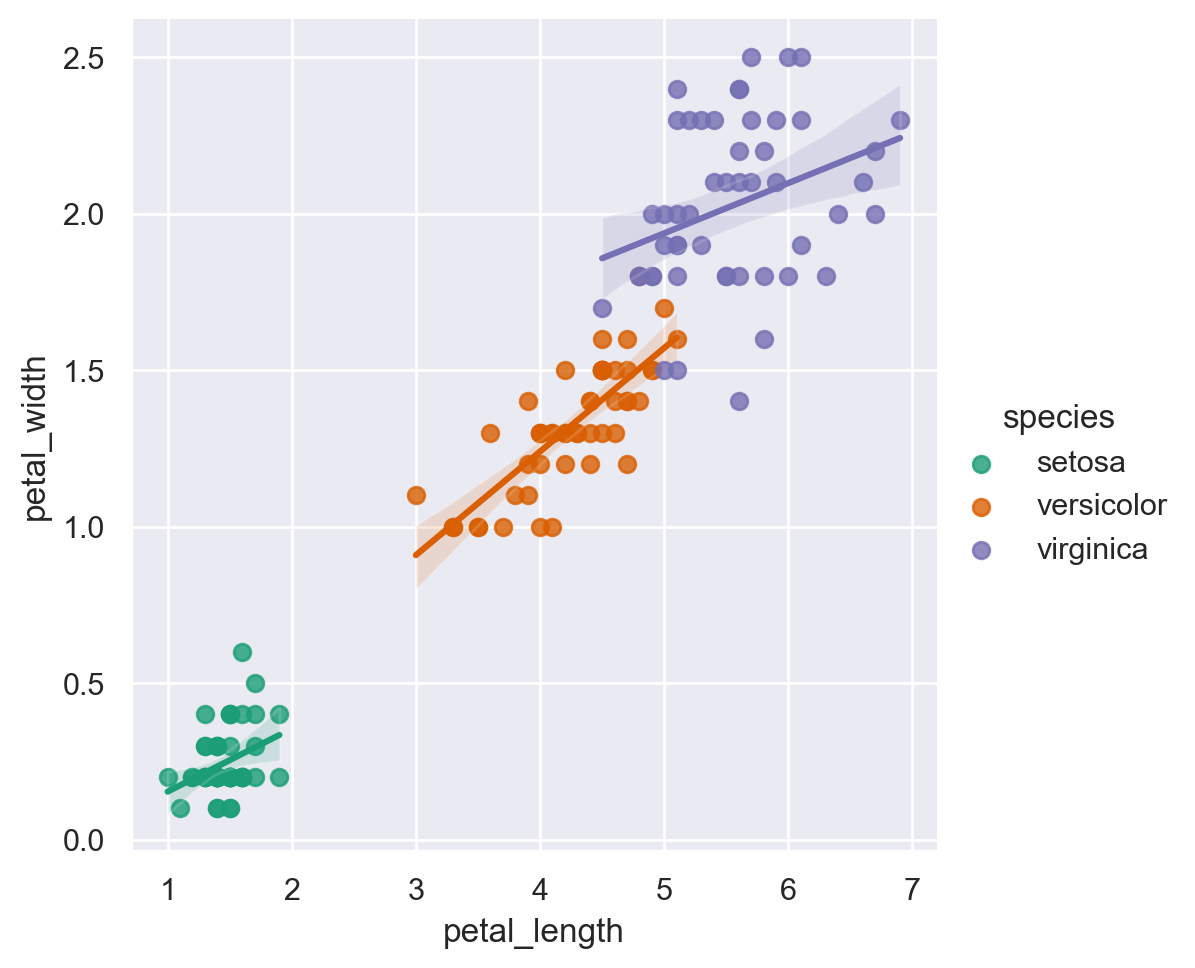

In [147]:
sns.lmplot(data=iris, x='petal_length', y='petal_width', hue='species')
plt.show()

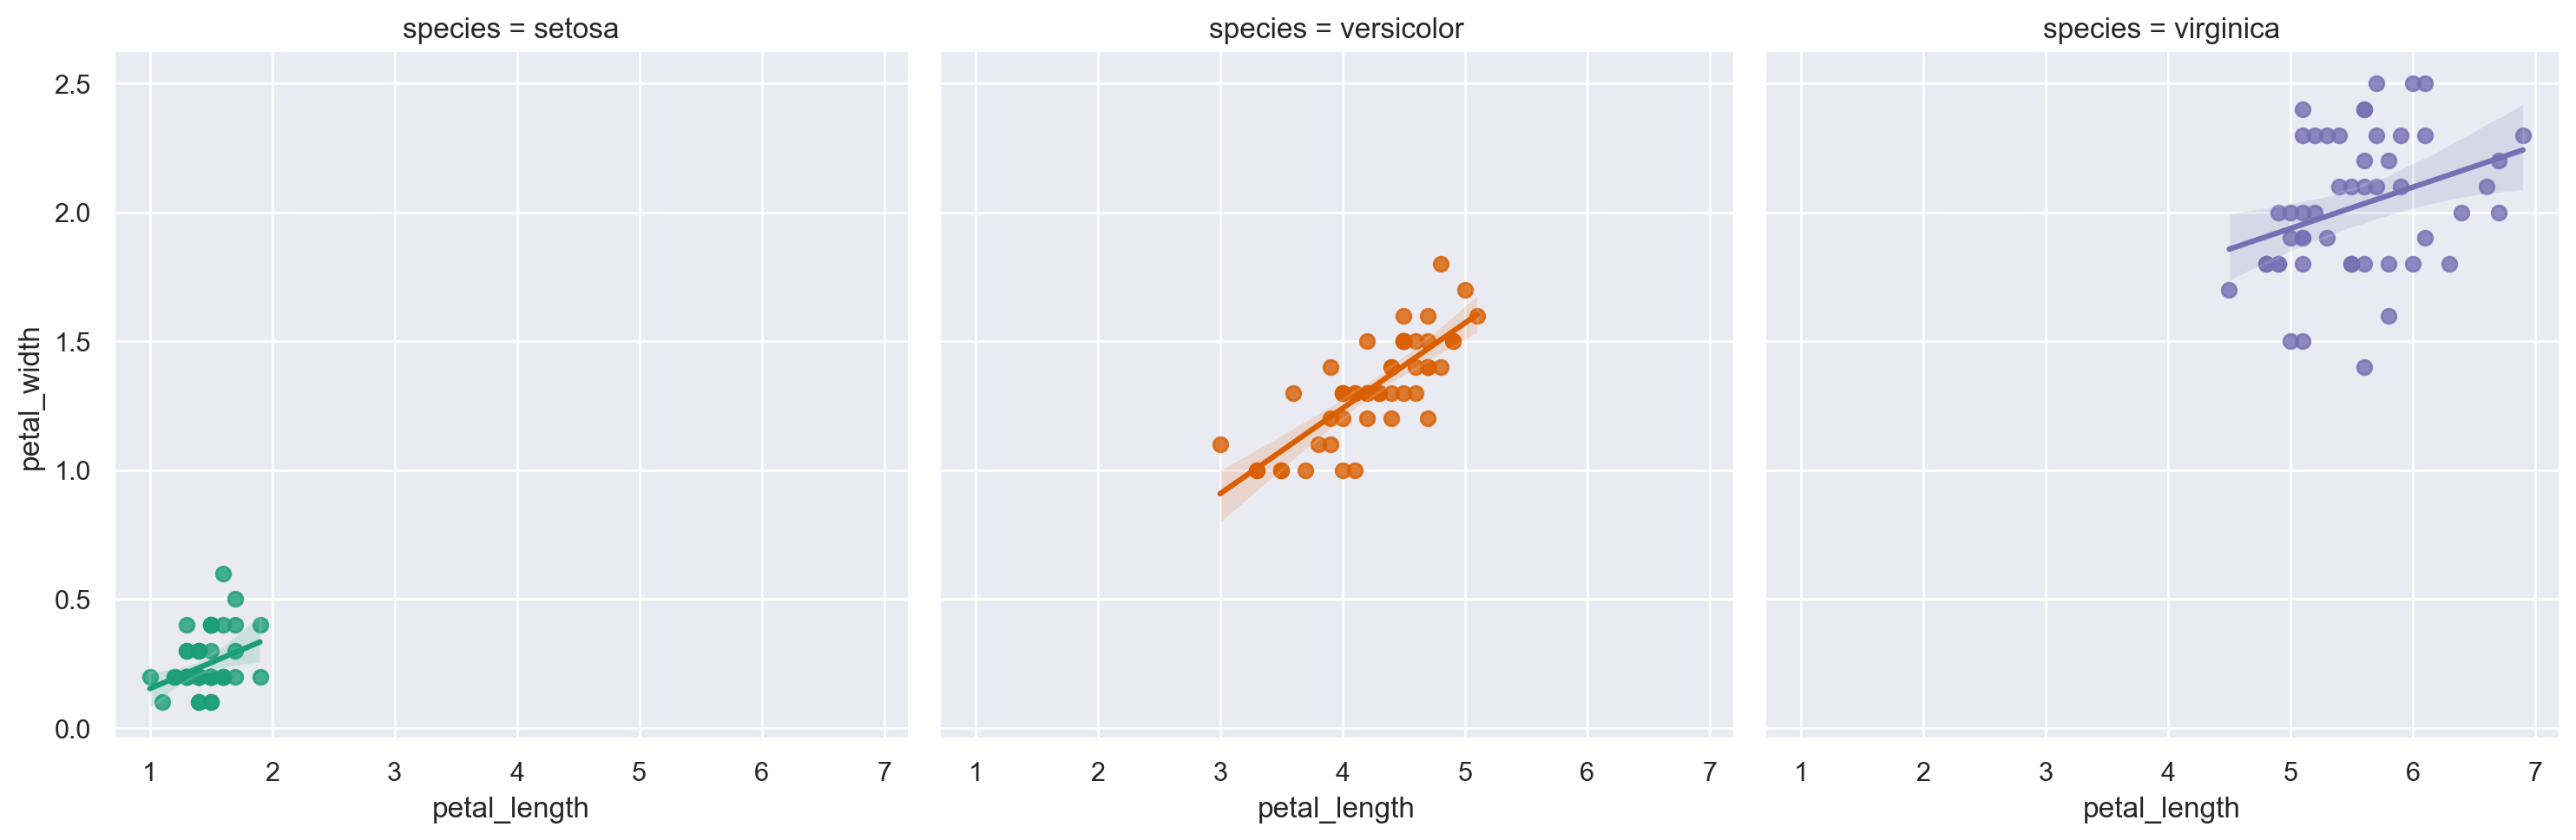

In [149]:
sns.lmplot(data=iris, x='petal_length', y='petal_width', hue='species',
          col='species'
          )
plt.show()

## 4. 다중 그래프를 위한 FacetGrid
https://seaborn.pydata.org/tutorial/axis_grids.html#conditional-small-multiples

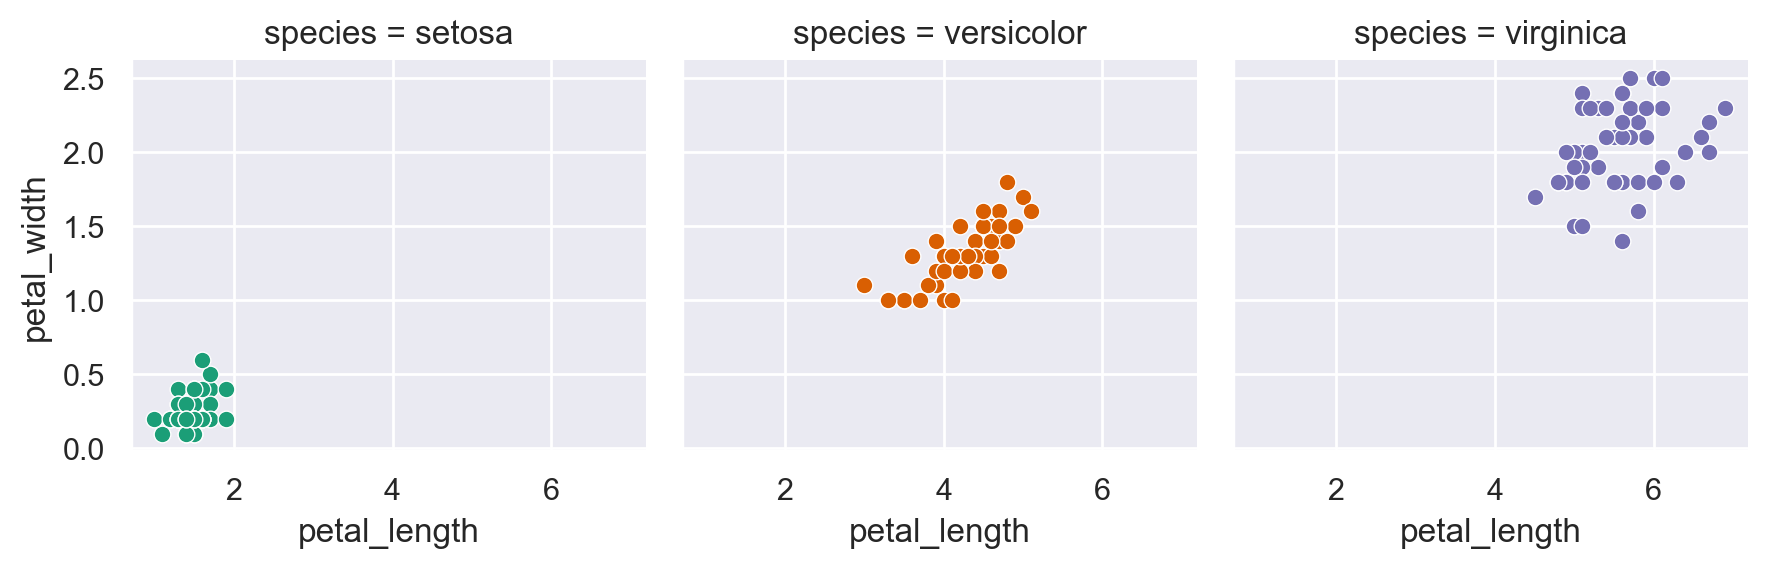

In [152]:
g = sns.FacetGrid(iris, col='species', hue='species')
g.map(sns.scatterplot, 'petal_length', 'petal_width')
plt.savefig('data/ch13.png')

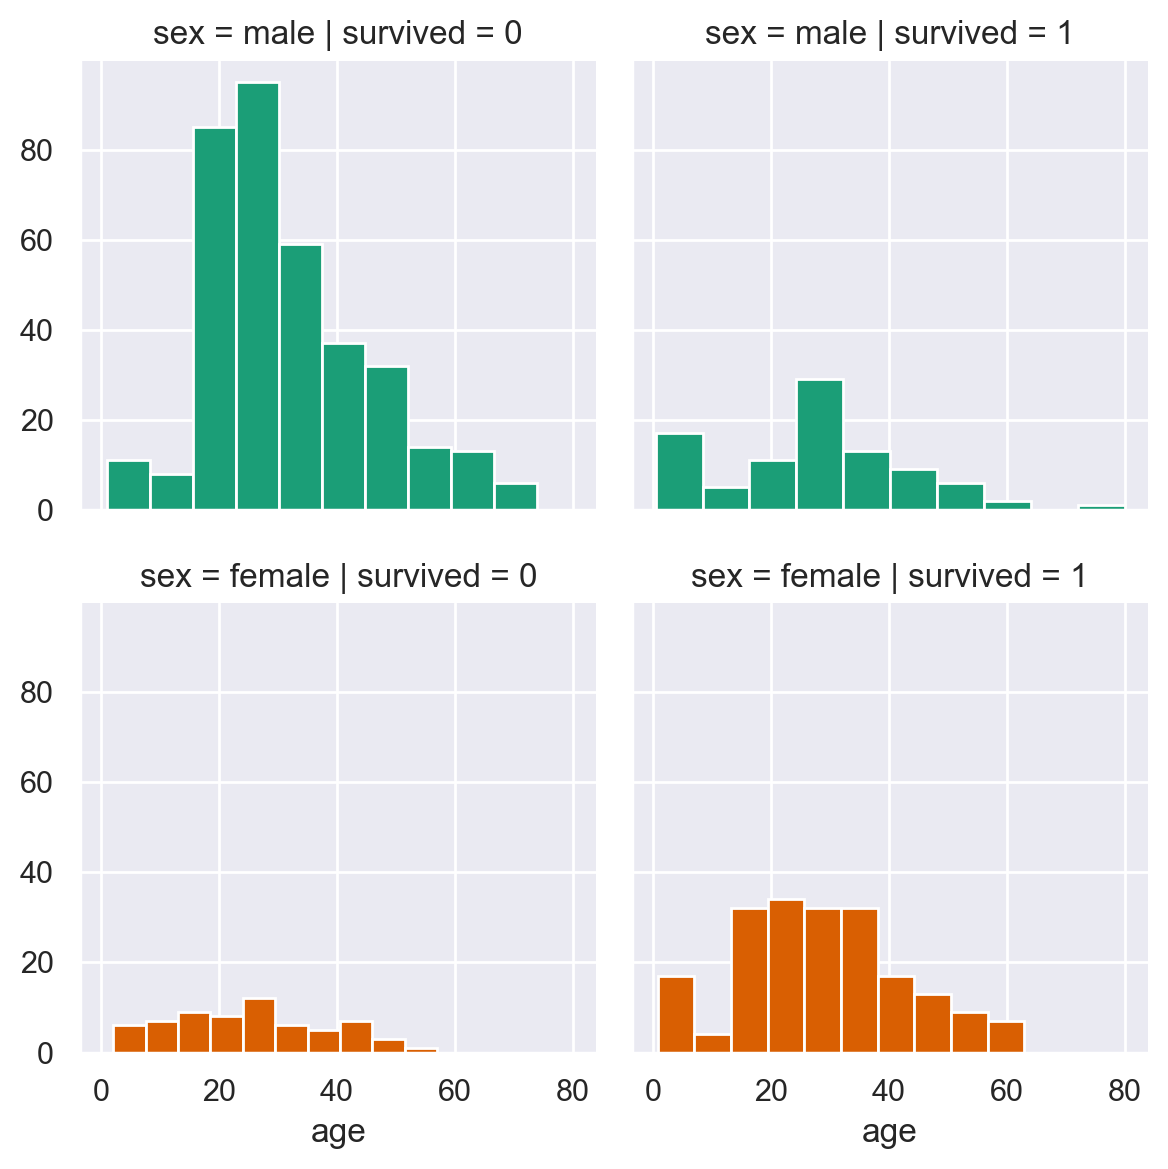

In [154]:
g = sns.FacetGrid(titanic, col='survived', hue='sex', row='sex')
g.map(plt.hist, "age")

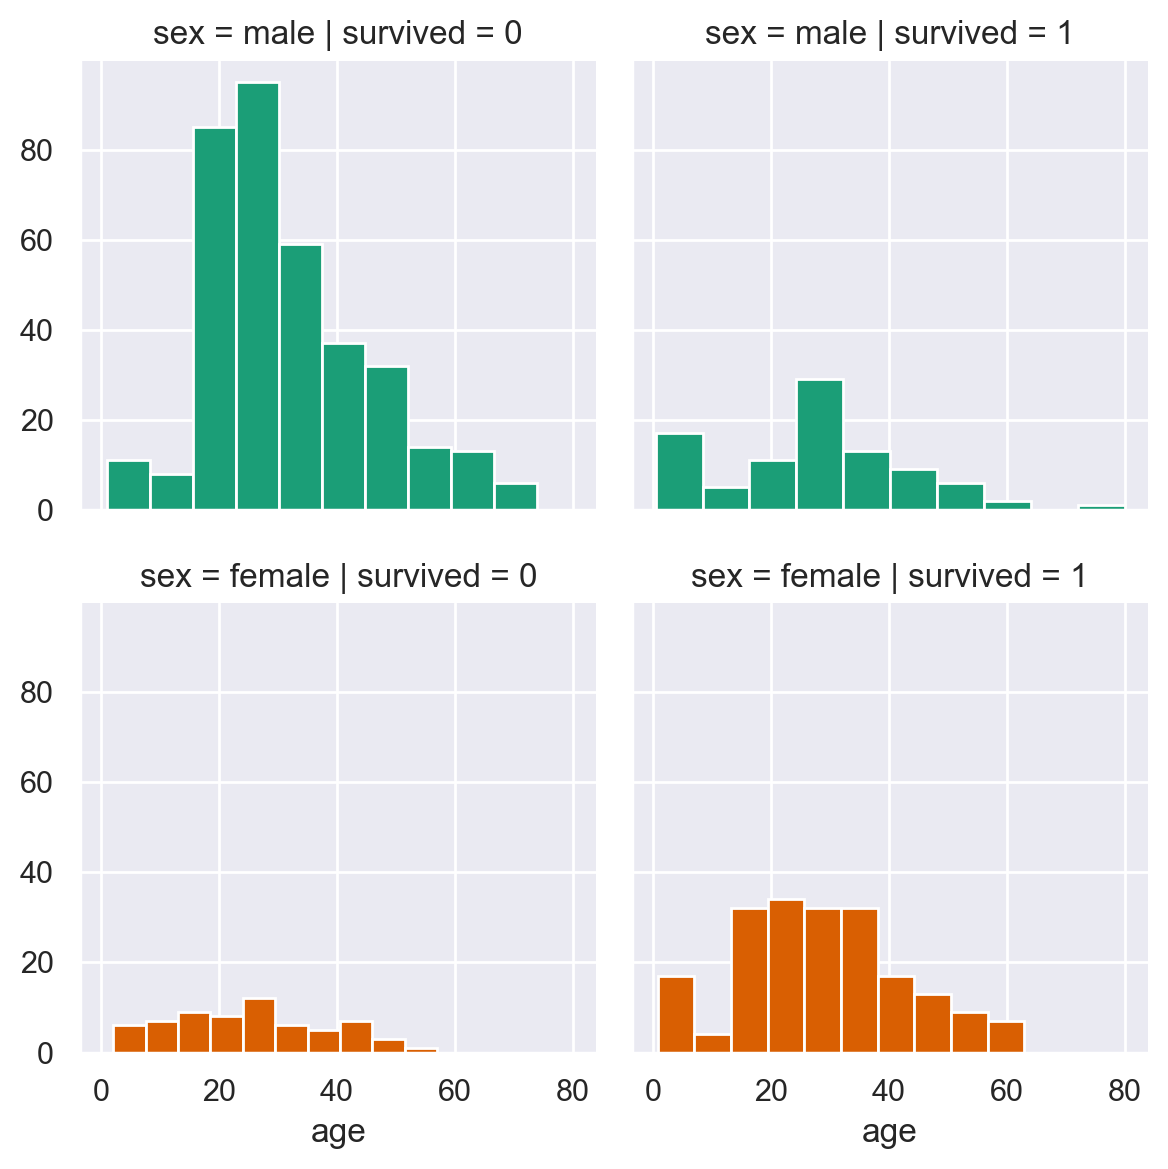

In [14]:
g = sns.FacetGrid(titanic, col='survived', row='sex', hue='sex')
g.map(plt.hist, "age")